In [1]:
import util
import matplotlib.pyplot as plt
import matplotlib
from datacube import DataCube
from calculate import pdf_calculator
from scipy.ndimage.filters import gaussian_filter1d
from scipy.signal import find_peaks
import numpy as np
import file

In [7]:
matplotlib.rcParams['figure.figsize'] = [10,10]
%matplotliblib qt

UsageError: Line magic function `%matplotliblib` not found.


In [4]:
def find_first_peak(azavg, derivative=0):
    # flattening
    first_peak_idx = 1
    for i in range(len(azavg)):
        if azavg[i] != 0:
            first_peak_idx = i
            break
    min_limit = first_peak_idx+int(len(azavg)/100)
    gaussian_sigma = 10
    range_slice = slice(first_peak_idx, first_peak_idx + int(len(azavg) * 0.3))
    filtered_part = gaussian_filter1d(azavg[first_peak_idx:first_peak_idx + int(len(azavg) * 0.3)], sigma=gaussian_sigma)
    azavg2 = azavg.copy()
    azavg2[range_slice] = filtered_part
    
    # first order
    x = azavg2[0:int(len(azavg) * 0.3)]
    low_peaks, _ = find_peaks(-x, distance=20)

    if len(low_peaks) > 0 and (derivative is not 2):
        plt.plot(azavg2[:300], label="smoothed") # plot smooth graph
        plt.legend()
        return low_peaks[0]
    if derivative == 1:
        return None

    # second order
    else:
        x = np.gradient(azavg2, 0.1)
        # peaks, _ = find_peaks(x, distance=20)
        low_peaks, _ = find_peaks(-x, distance=20)

        # peaks = peaks[azavg2[peaks] != 0]
        low_peaks = low_peaks[azavg2[low_peaks] != 0]

        
        for lp in low_peaks:
            if lp>min_limit:
                plt.plot(azavg2[:300], label="smoothed") # plot smooth graph
                plt.legend()
                return lp
        return None

210311/Au/Camera 230 mm Ceta 20210311 1324.mrc
index_num = 0
210311/Au/Camera 230 mm Ceta 20210311 1327.mrc
index_num = 1
210311/sample46_TiGe27_bot_AD/Camera 230 mm Ceta 20210311 1405_2s_1f_area01.mrc
index_num = 2
210311/sample46_TiGe27_bot_AD/Camera 230 mm Ceta 20210311 1405_2s_1f_reduceNoise.mrc
index_num = 3
210311/sample46_TiGe27_bot_AD/Camera 230 mm Ceta 20210311 1407_40s_20f_area01.mrc
index_num = 4
210311/sample46_TiGe27_bot_AD/Camera 230 mm Ceta 20210311 1413_50s_20f_area02.mrc
index_num = 5
210311/sample46_TiGe27_bot_AD/Camera 230 mm Ceta 20210311 1413_50s_20f_area02_image.mrc
index_num = 6
210311/sample46_TiGe27_bot_AD/Camera 230 mm Ceta 20210311 1418_50s_20f_area03.mrc
index_num = 7
210311/sample46_TiGe27_bot_AD/Camera 230 mm Ceta 20210311 1418_50s_20f_area03_image.mrc
index_num = 8
210311/sample46_TiGe27_bot_AD/Camera 230 mm Ceta 20210311 1422_60s_20f_area03.mrc
index_num = 9
210311/sample46_TiGe27_bot_AD/Camera 230 mm Ceta 20210311 1425_70s_20f_area03.mrc
index_num = 10


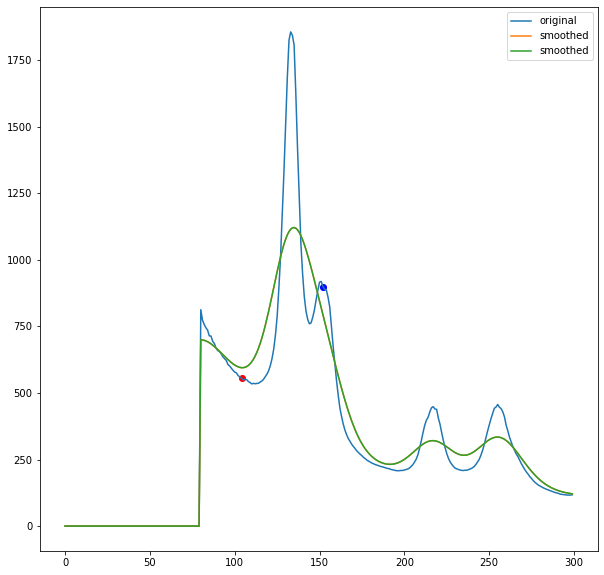

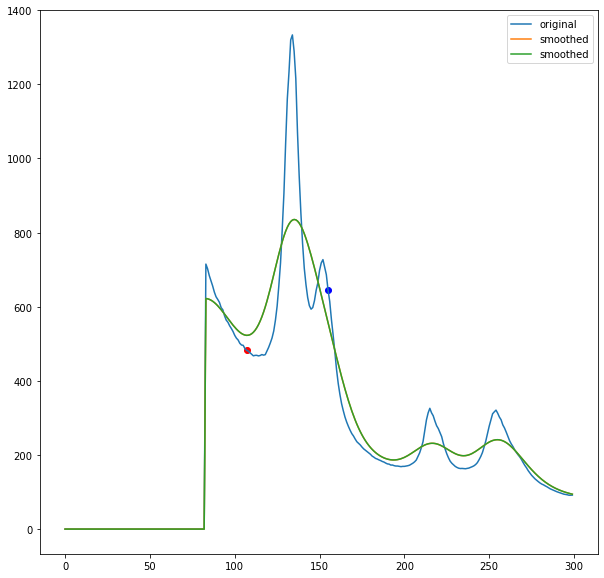

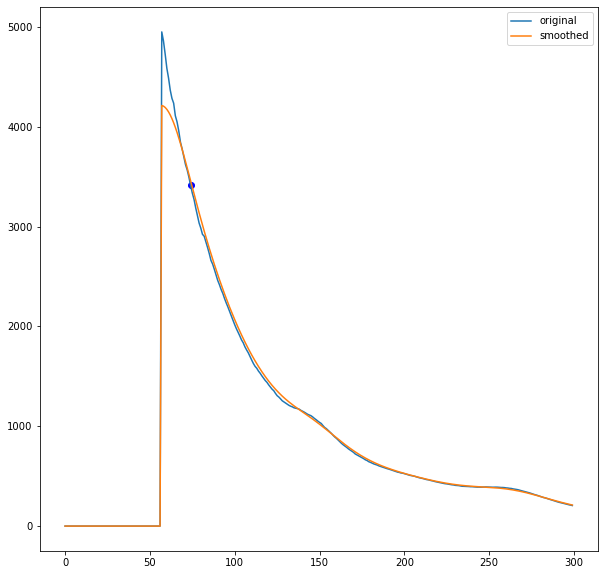

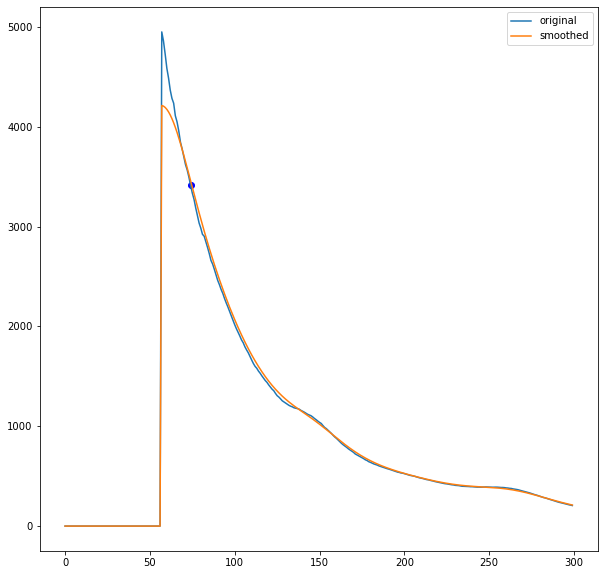

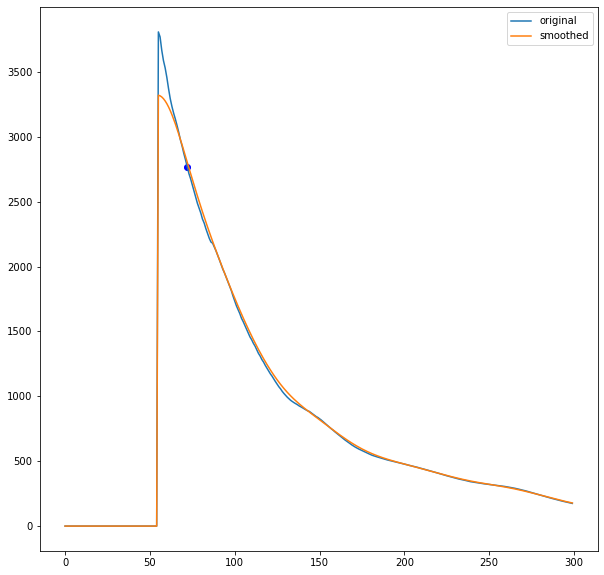

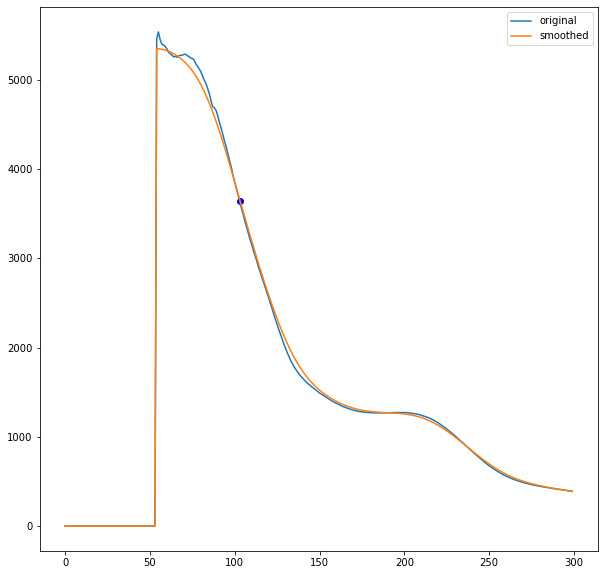

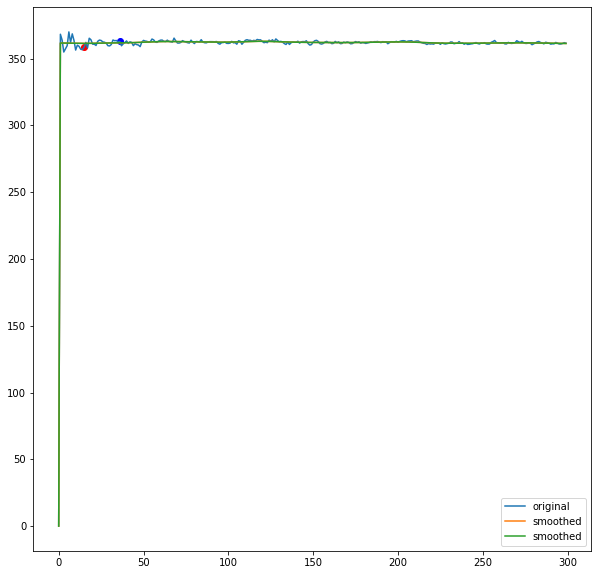

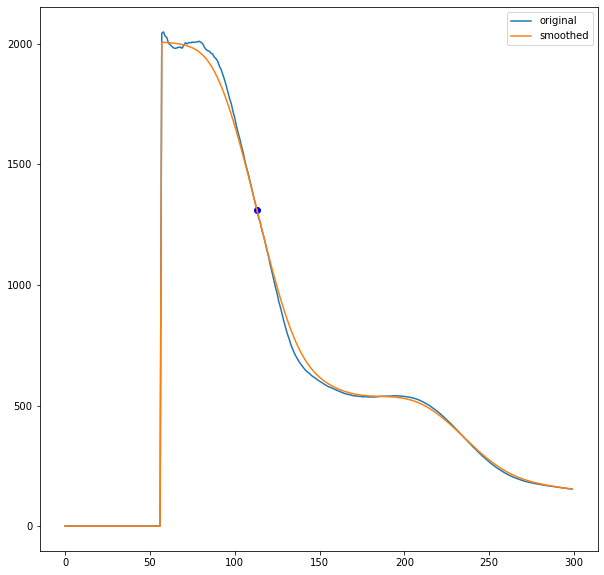

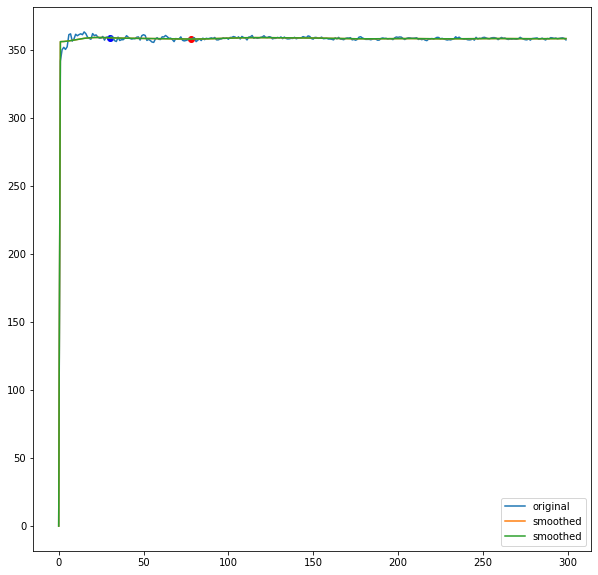

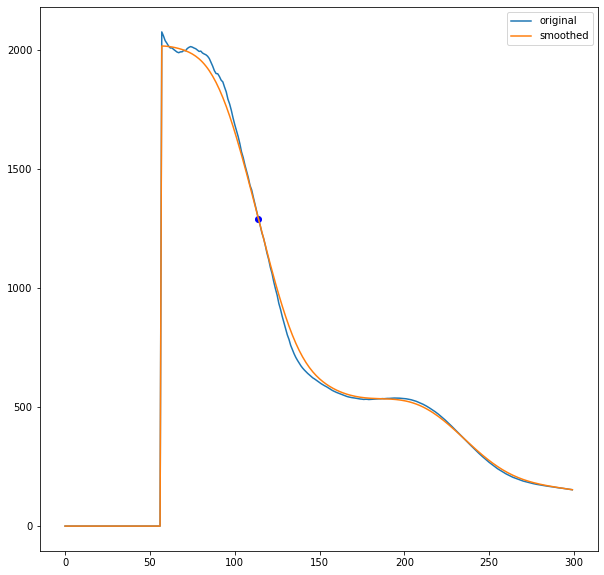

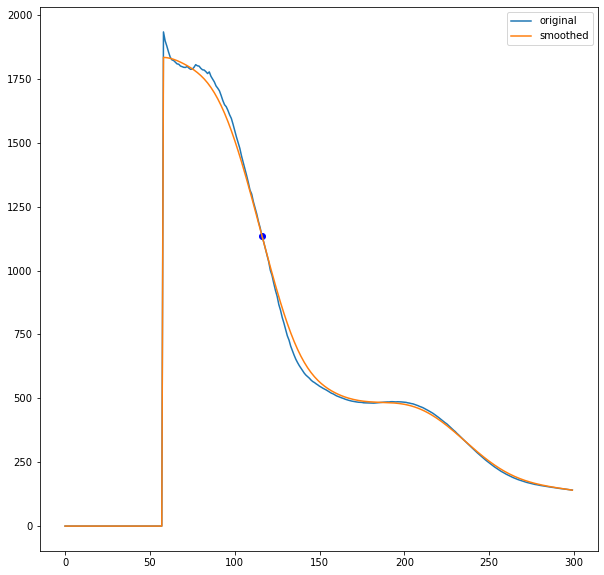

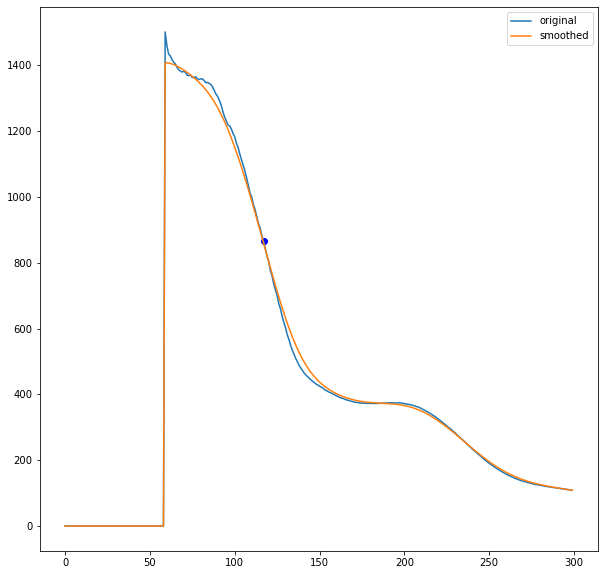

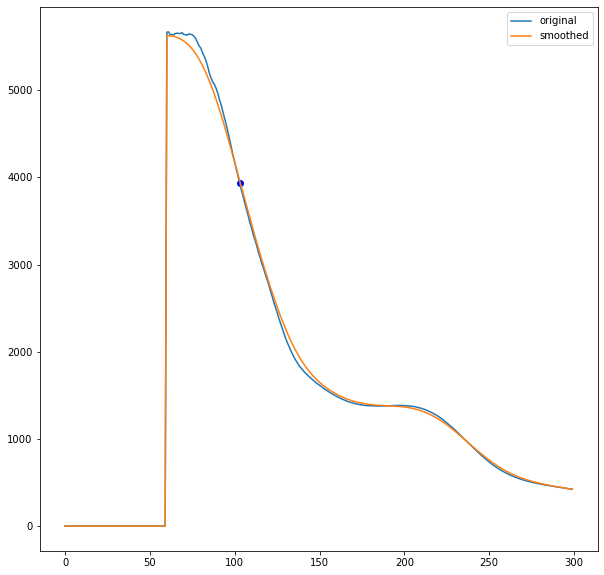

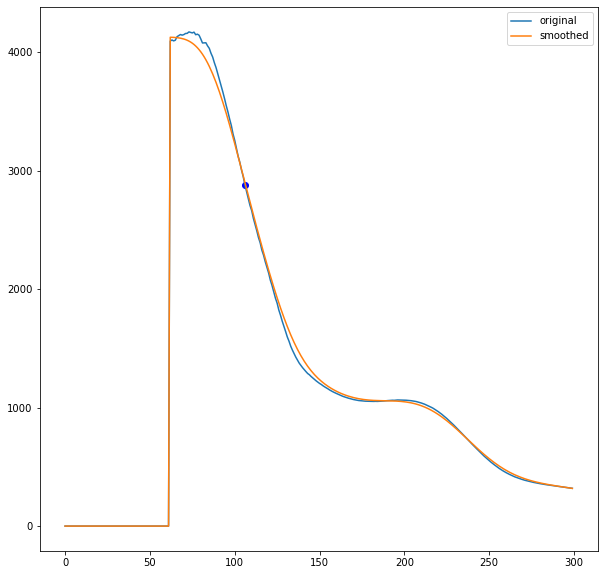

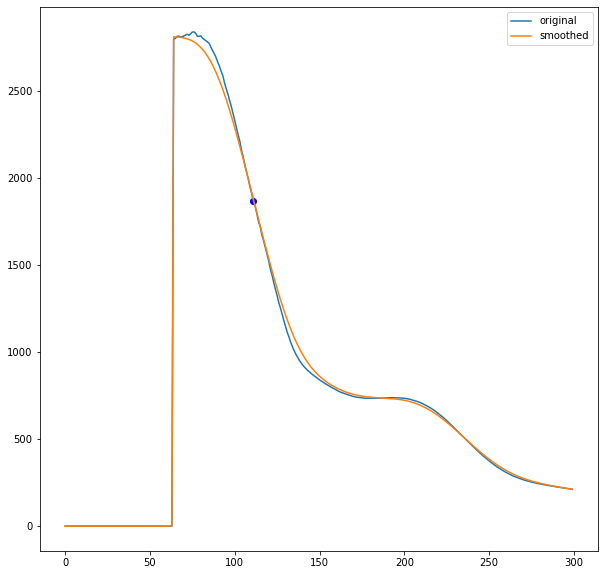

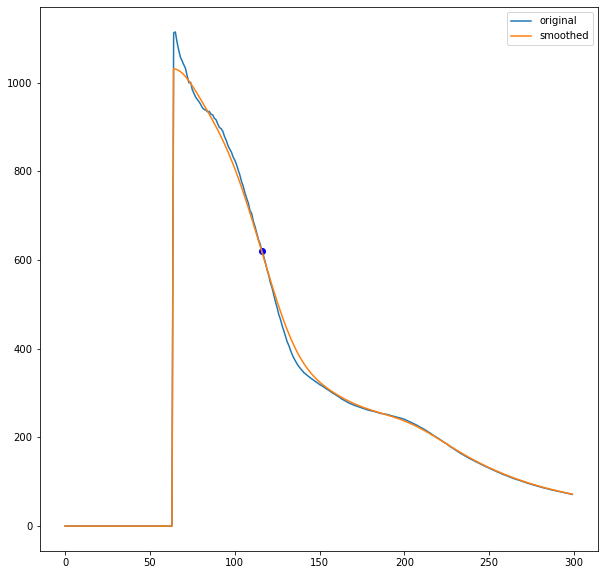

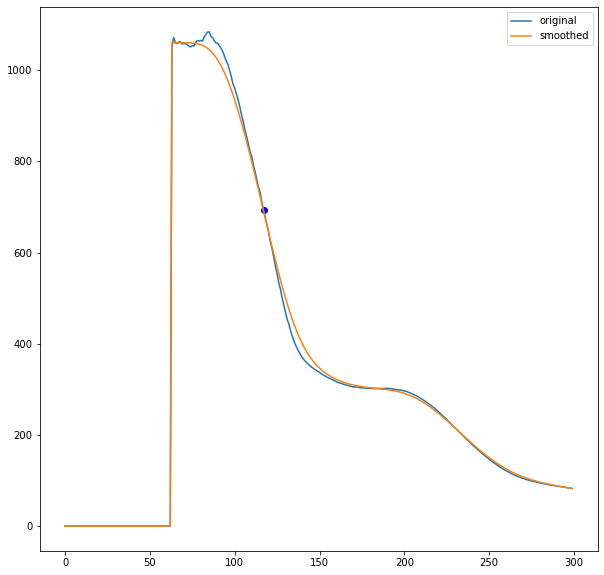

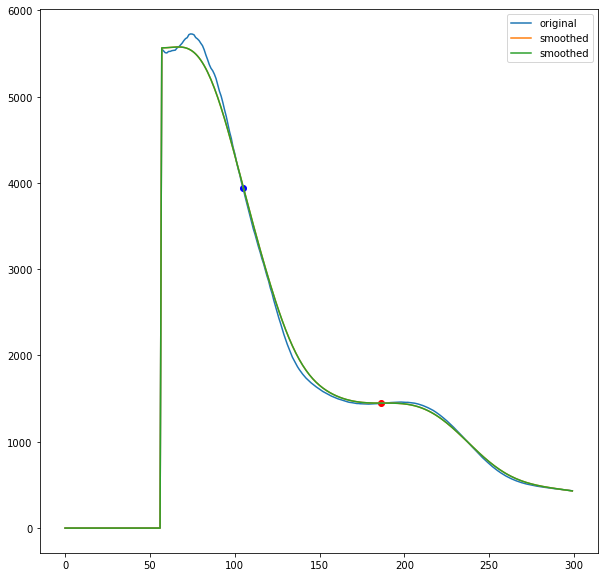

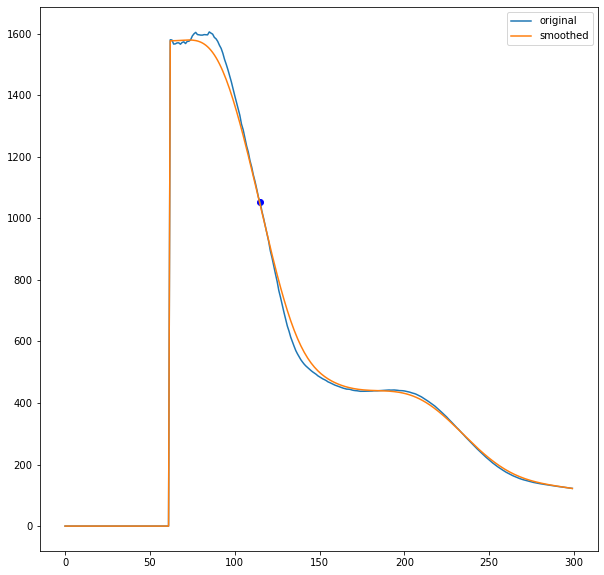

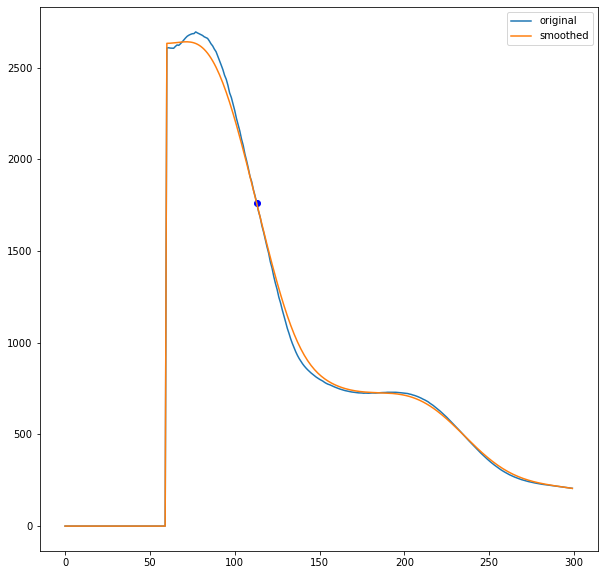

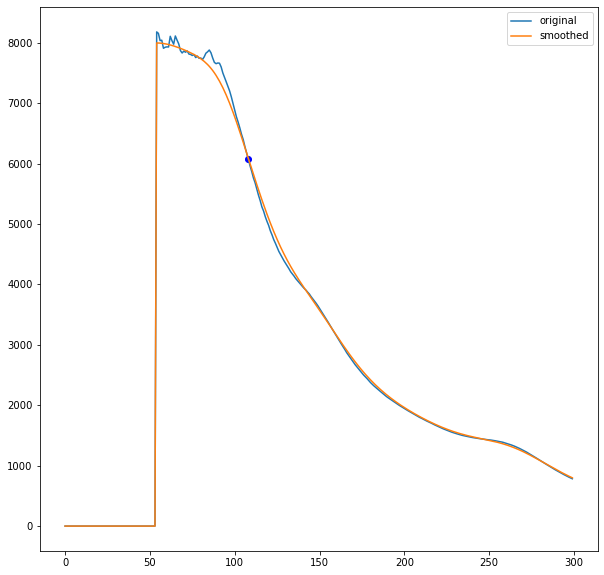

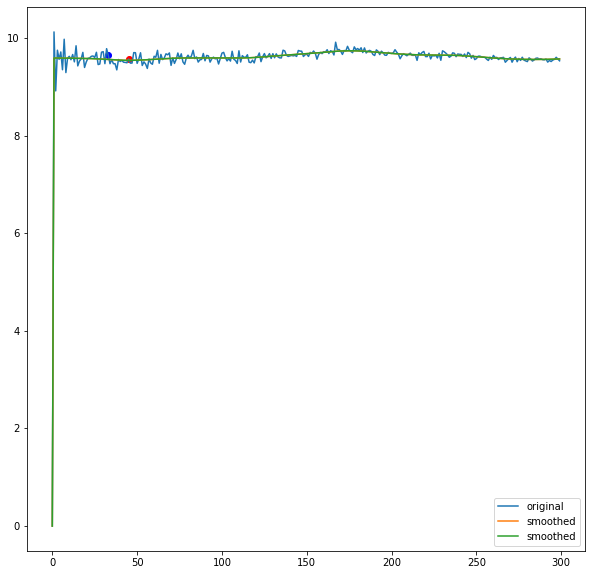

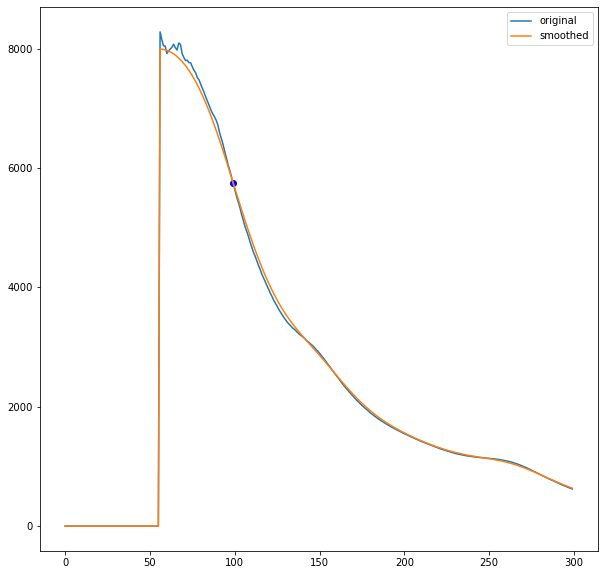

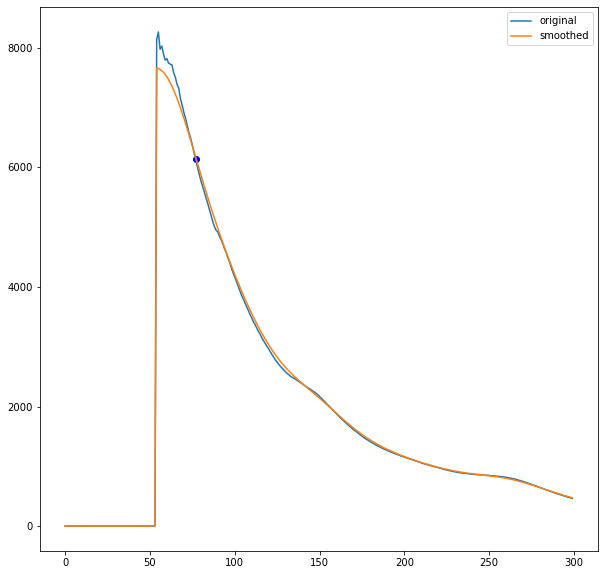

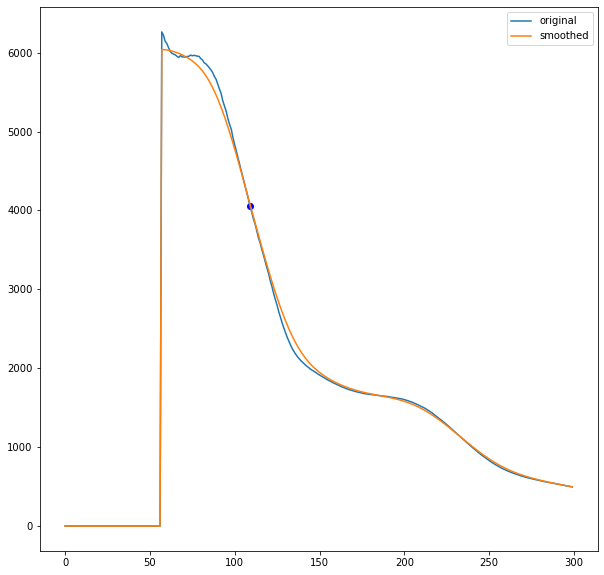

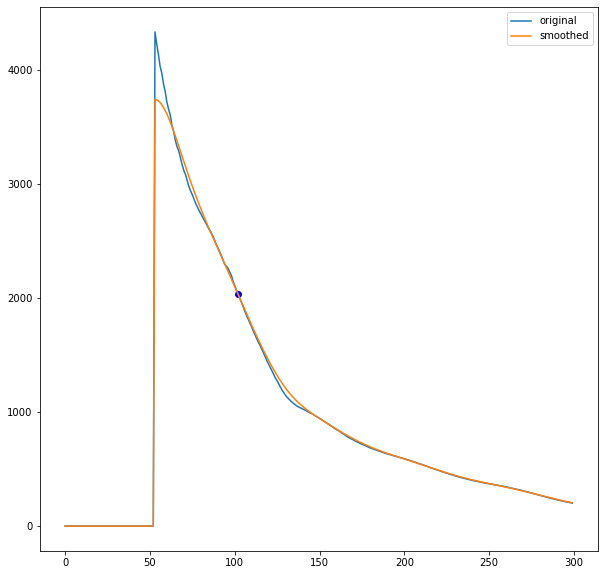

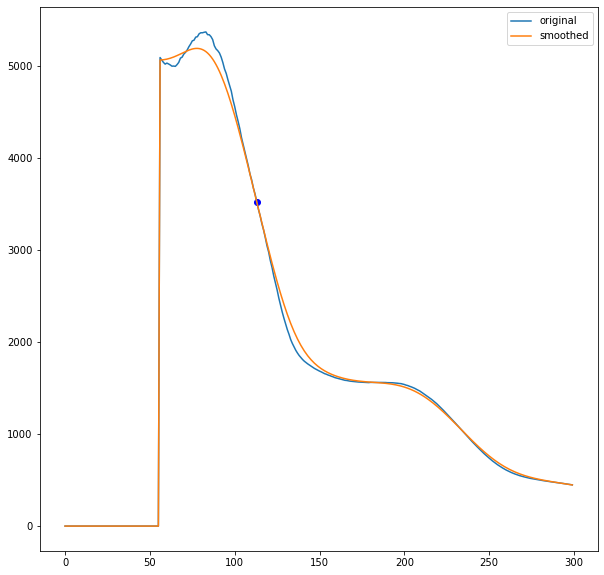

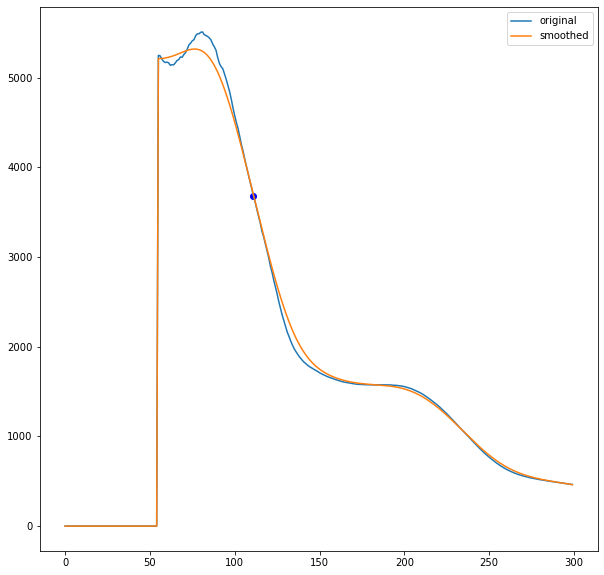

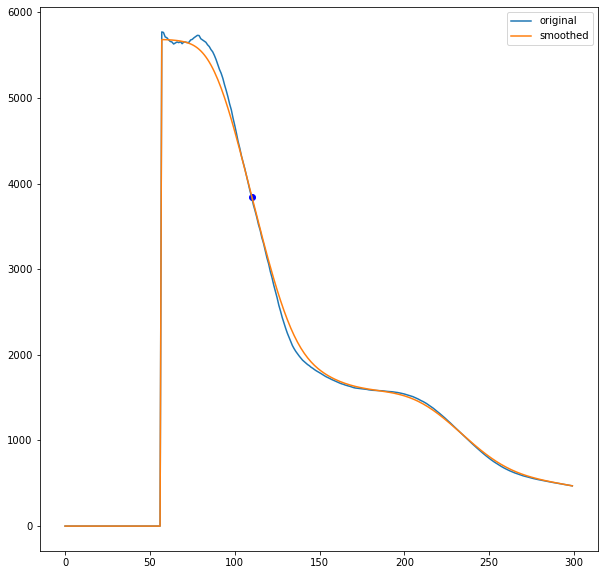

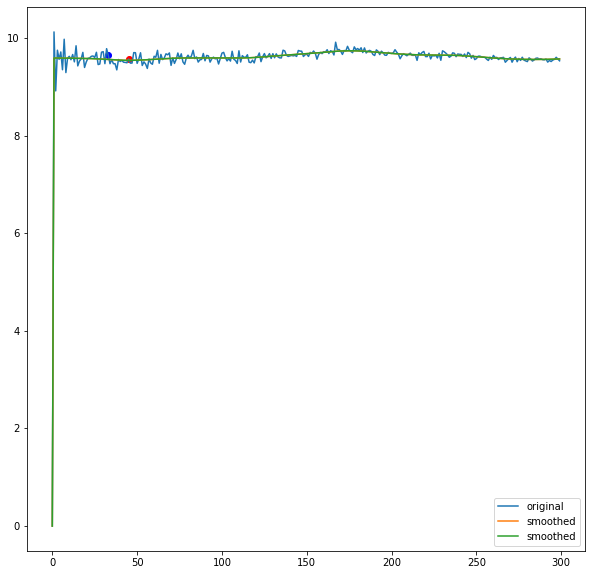

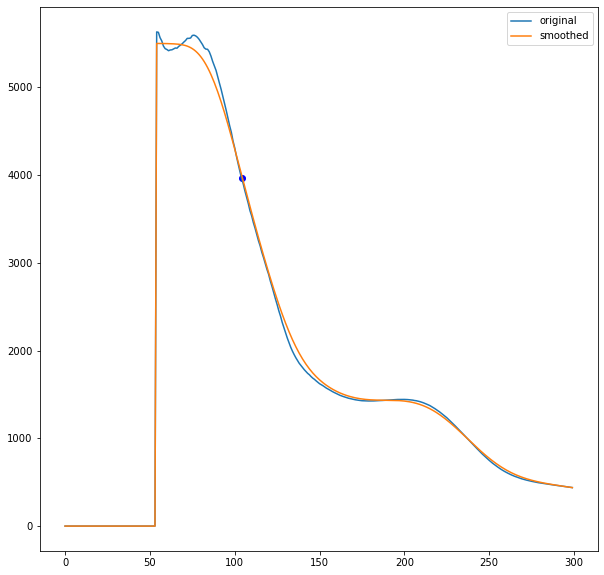

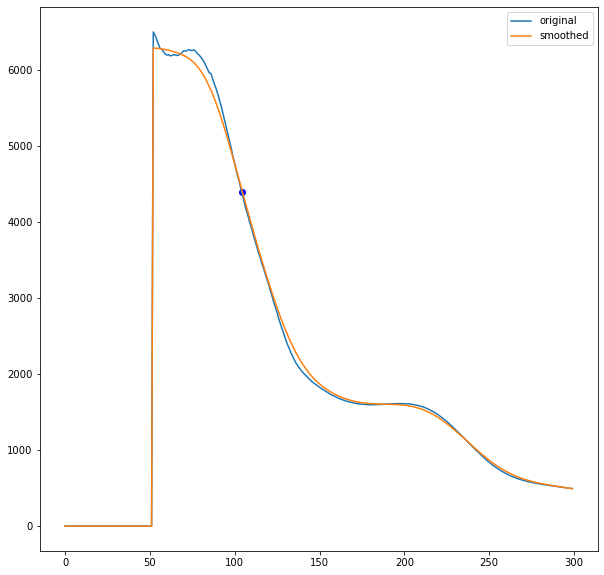

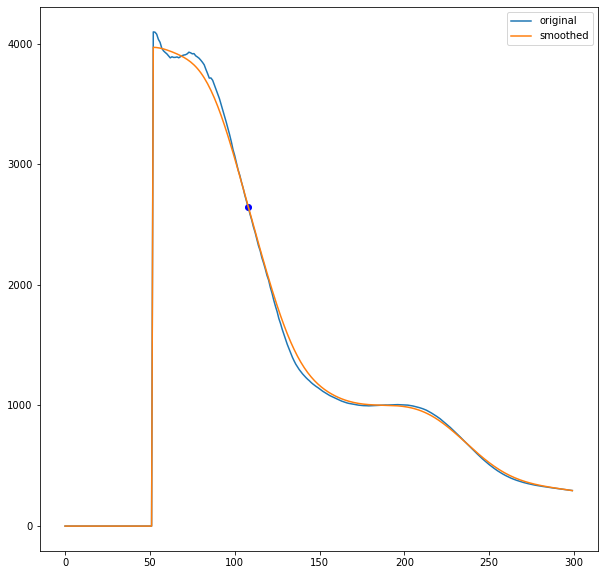

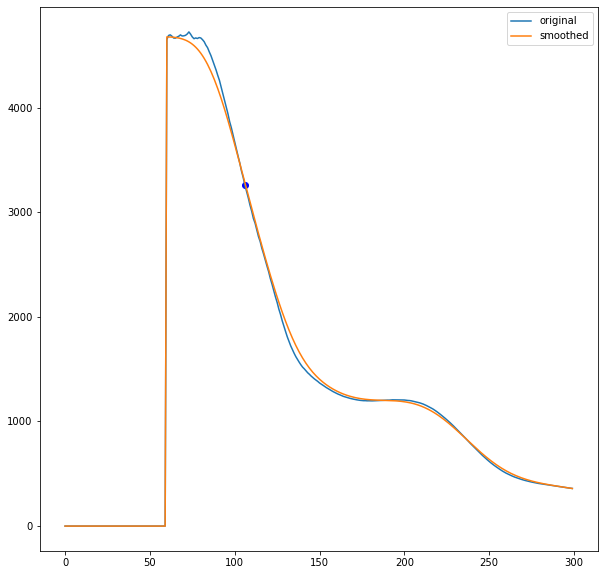

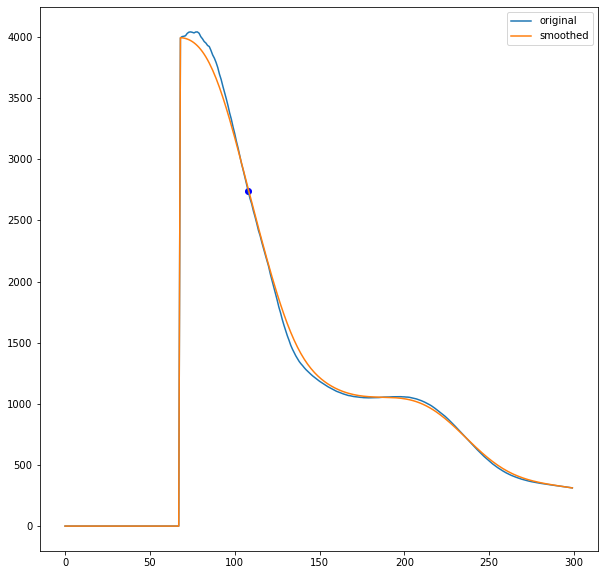

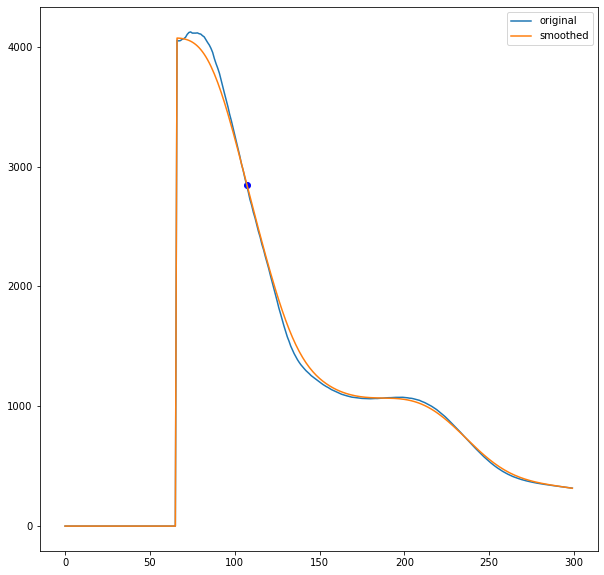

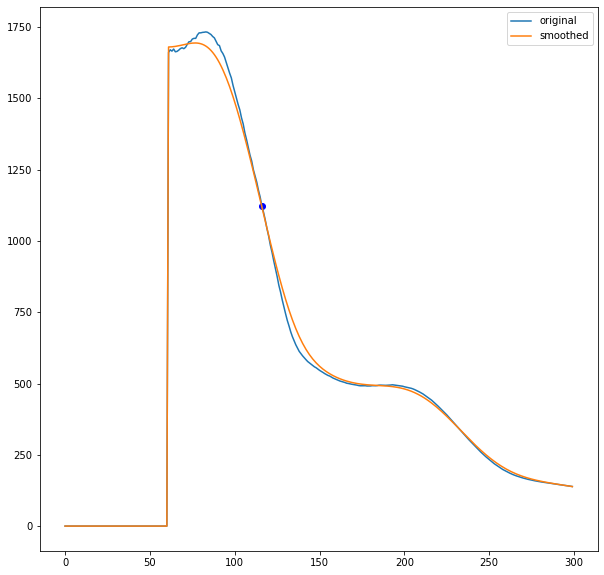

In [7]:
dcs = [DataCube(fp) for fp in file.get_file_list_from_path("/mnt/experiment/TEM diffraction/210311",".mrc")]
indices = range(len(dcs))
for idx in indices:
    print(dcs[idx].mrc_file_path[32:])
    print("index_num =",idx)
    util.load_previous_tiff(dcs[idx])
    util.load_previous_dc_azavg(dcs[idx])
#     plt.imshow(dcs[idx].display_img)
#     plt.show()
    
    plt.plot(dcs[idx].azavg[0:300], label="original")
    plt.legend()
    
    first_derv_peak = find_first_peak(dcs[idx].azavg,1)
    second_derv_peak = find_first_peak(dcs[idx].azavg,2)
    if first_derv_peak is not None:
        plt.scatter(first_derv_peak,dcs[idx].azavg[first_derv_peak],color='r')
    if second_derv_peak is not None:
        plt.scatter(second_derv_peak,dcs[idx].azavg[second_derv_peak],color='b')
    plt.show()

210311/Au/Camera 230 mm Ceta 20210311 1324.mrc
index_num = 0
210311/Au/Camera 230 mm Ceta 20210311 1327.mrc
index_num = 1
210311/sample46_TiGe27_bot_AD/Camera 230 mm Ceta 20210311 1405_2s_1f_area01.mrc
index_num = 2
210311/sample46_TiGe27_bot_AD/Camera 230 mm Ceta 20210311 1405_2s_1f_reduceNoise.mrc
index_num = 3
210311/sample46_TiGe27_bot_AD/Camera 230 mm Ceta 20210311 1407_40s_20f_area01.mrc
index_num = 4
210311/sample46_TiGe27_bot_AD/Camera 230 mm Ceta 20210311 1413_50s_20f_area02.mrc
index_num = 5
210311/sample46_TiGe27_bot_AD/Camera 230 mm Ceta 20210311 1413_50s_20f_area02_image.mrc
index_num = 6
210311/sample46_TiGe27_bot_AD/Camera 230 mm Ceta 20210311 1418_50s_20f_area03.mrc
index_num = 7
210311/sample46_TiGe27_bot_AD/Camera 230 mm Ceta 20210311 1418_50s_20f_area03_image.mrc
index_num = 8
210311/sample46_TiGe27_bot_AD/Camera 230 mm Ceta 20210311 1422_60s_20f_area03.mrc
index_num = 9
210311/sample46_TiGe27_bot_AD/Camera 230 mm Ceta 20210311 1425_70s_20f_area03.mrc
index_num = 10


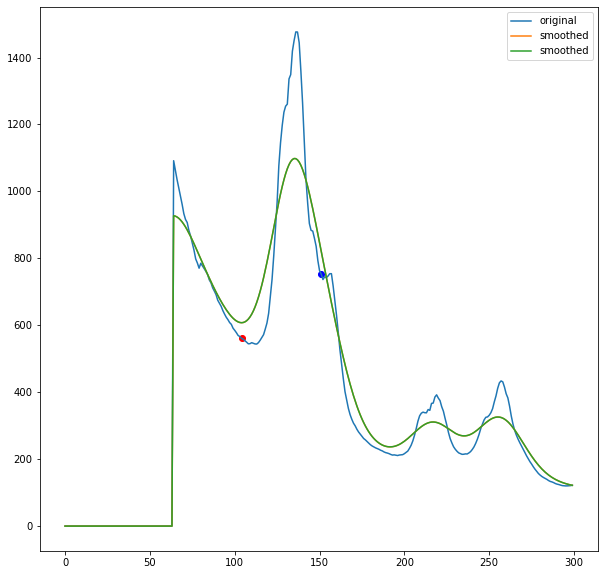

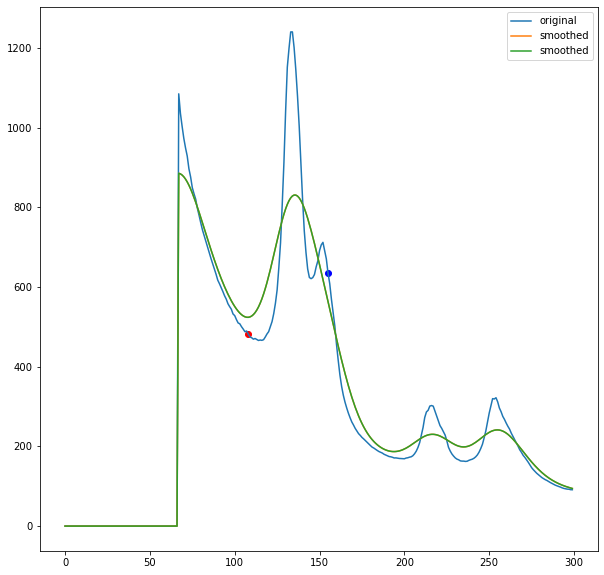

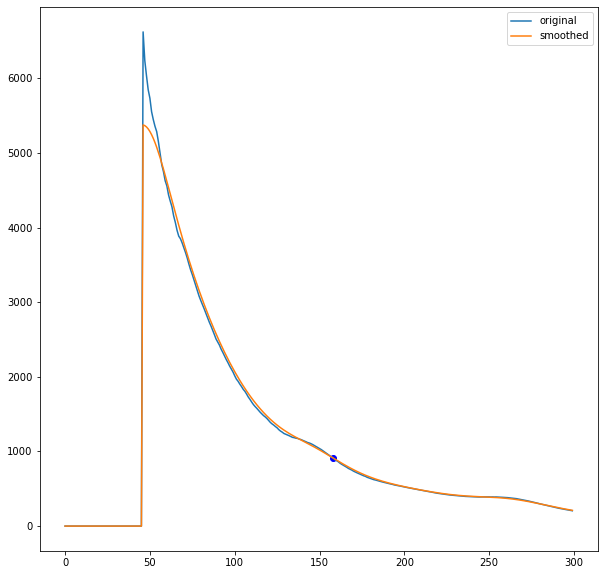

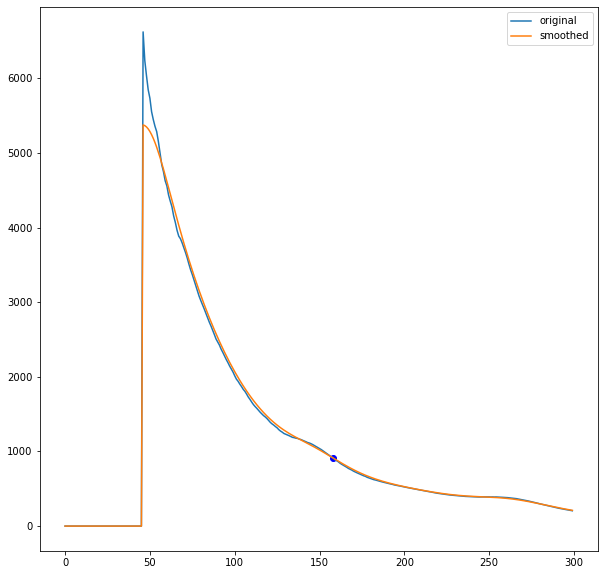

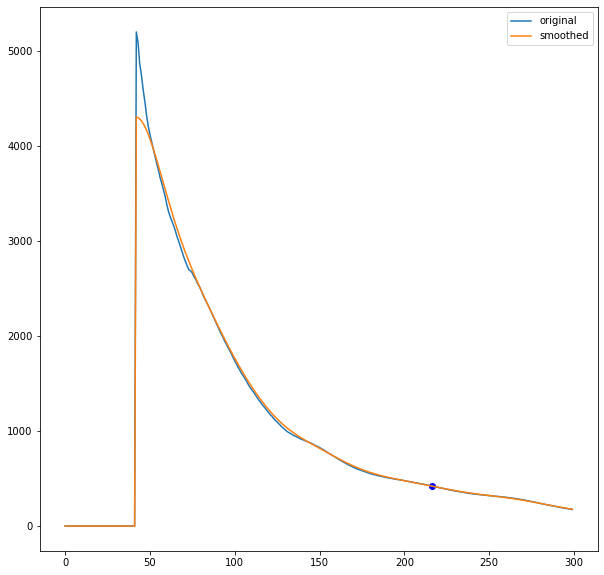

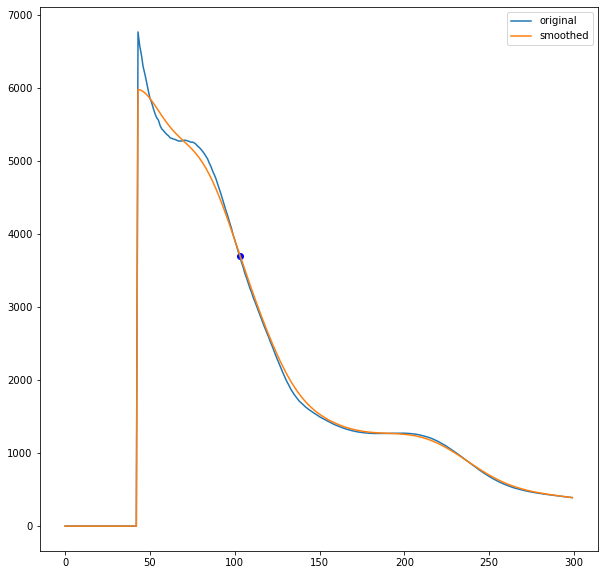

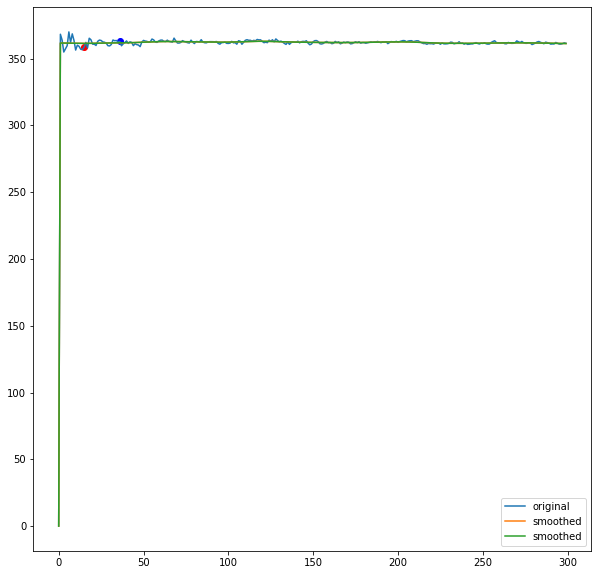

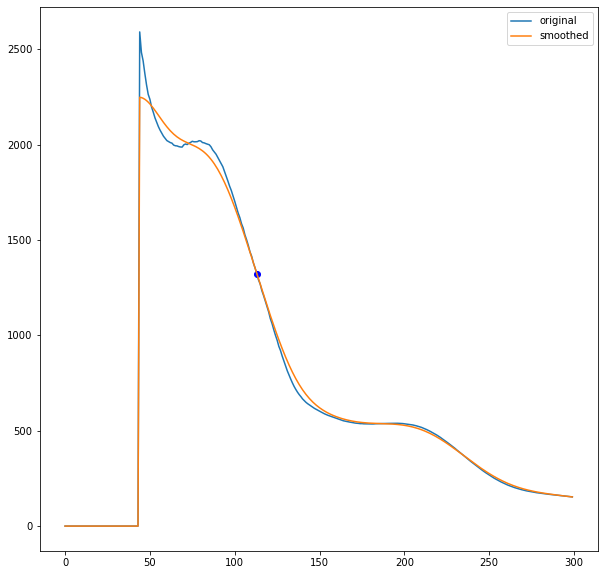

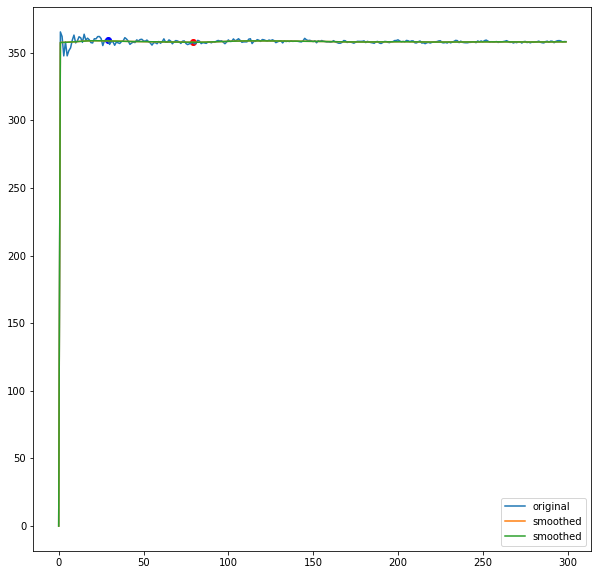

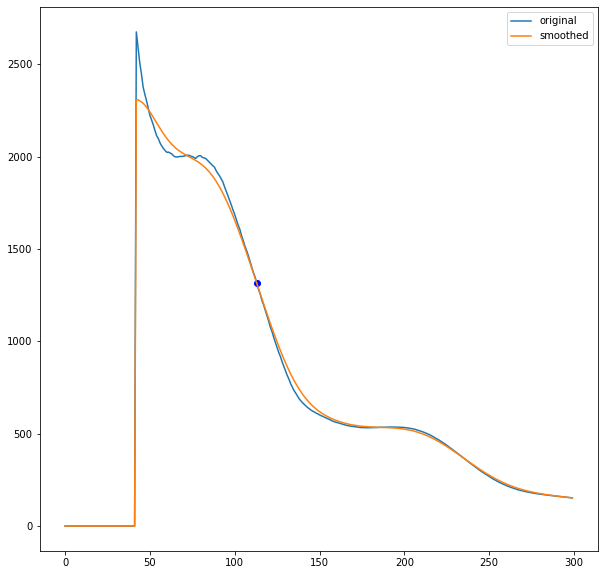

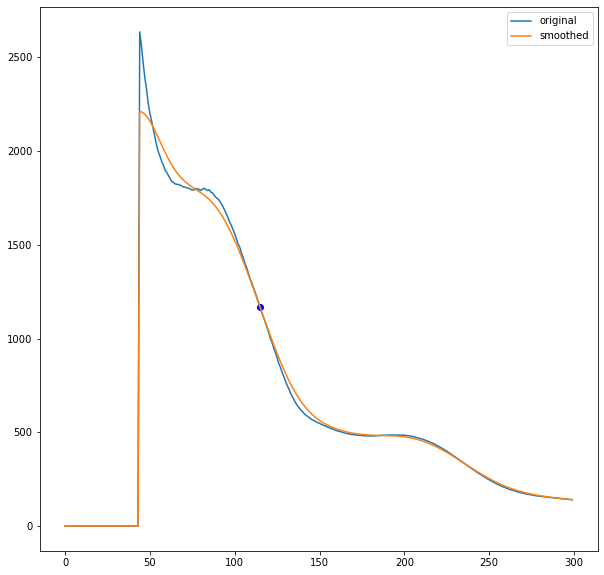

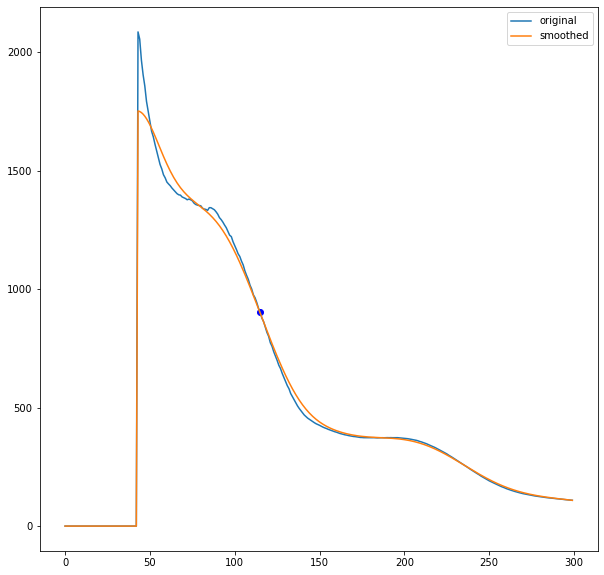

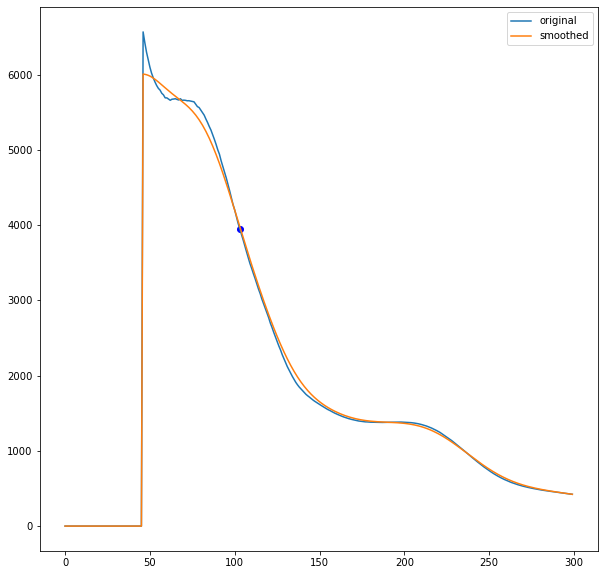

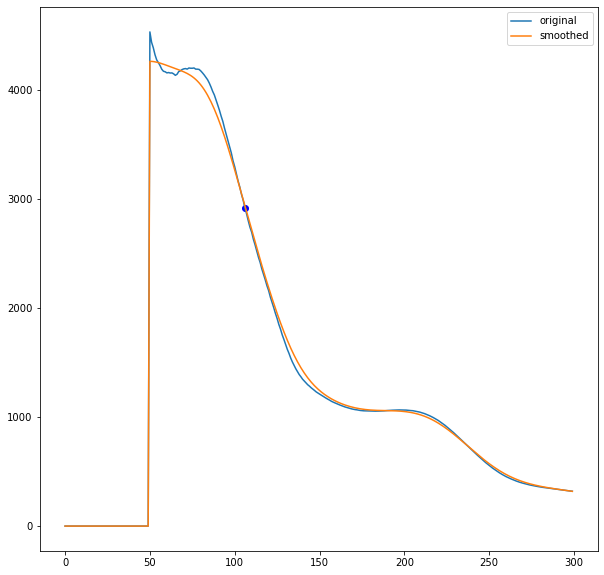

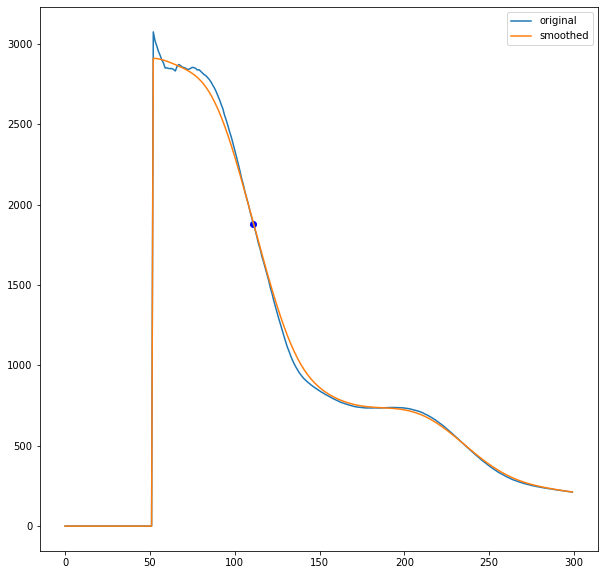

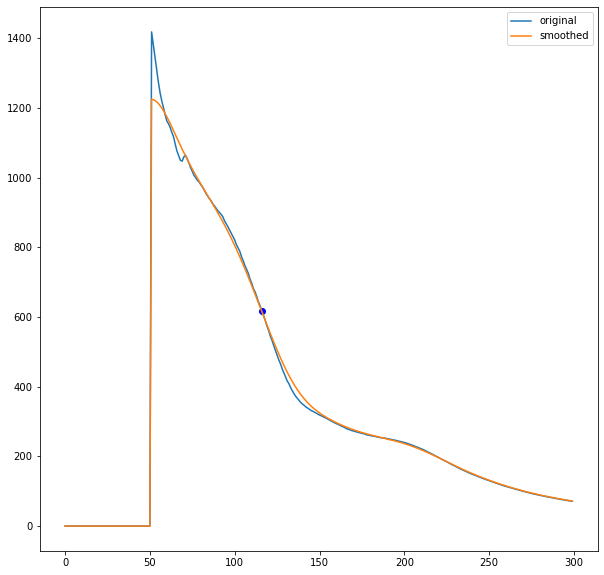

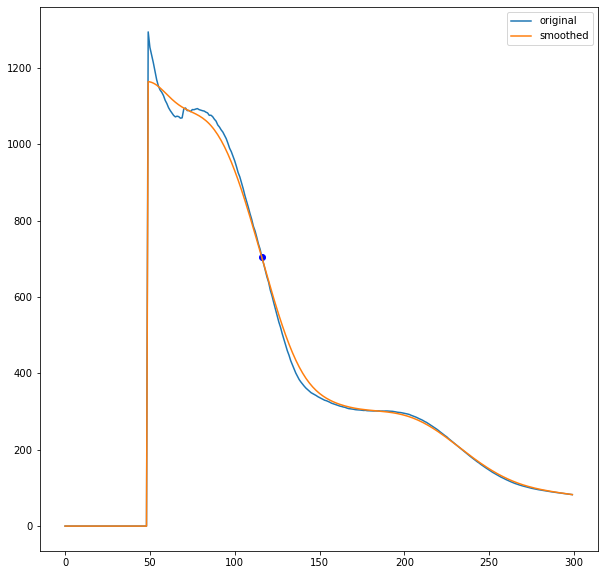

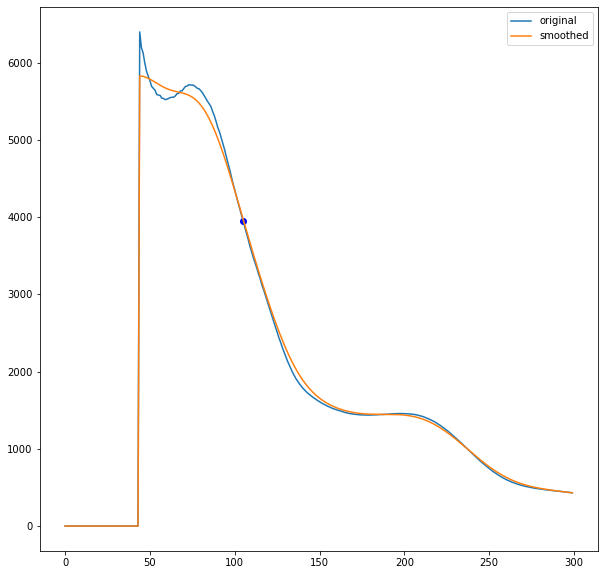

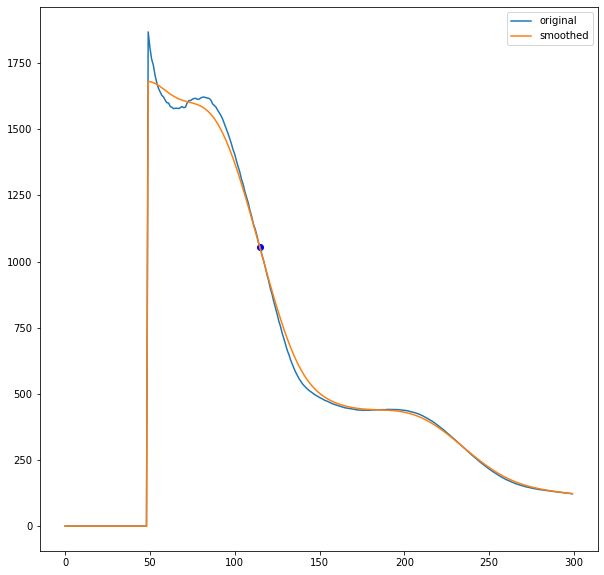

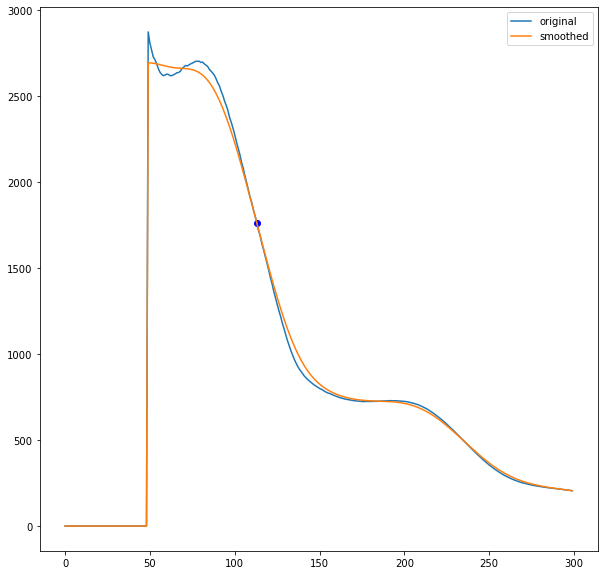

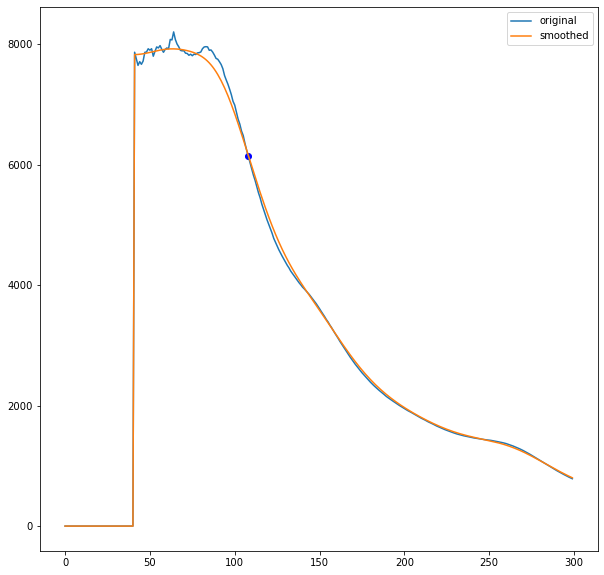

TypeError: 'NoneType' object is not subscriptable

In [5]:
dcs = [DataCube(fp) for fp in file.get_file_list_from_path("/mnt/experiment/TEM diffraction/210311",".mrc")]
indices = range(len(dcs))
for idx in indices:
    print(dcs[idx].mrc_file_path[32:])
    print("index_num =",idx)
    util.load_previous_tiff(dcs[idx])
    util.load_previous_dc_azavg(dcs[idx])
#     plt.imshow(dcs[idx].display_img)
#     plt.show()

    plt.plot(dcs[idx].azavg[0:300], label="original")
    plt.legend()

    first_derv_peak = find_first_peak(dcs[idx].azavg,1)
    second_derv_peak = find_first_peak(dcs[idx].azavg,2)
    if first_derv_peak is not None:
        plt.scatter(first_derv_peak,dcs[idx].azavg[first_derv_peak],color='r')
    if second_derv_peak is not None:
        plt.scatter(second_derv_peak,dcs[idx].azavg[second_derv_peak],color='b')
    plt.show()

In [3]:
dcs = [DataCube(fp) for fp in file.get_file_list_from_path("/mnt/experiment/TEM diffraction/210506",".mrc")]
indices = range(len(dcs))
for idx in indices:
    print(dcs[idx].file_path[32:])
    print("index_num =",idx)
    util.load_previous_tiff(dcs[idx])
    util.load_previous_dc_azavg(dcs[idx])
#     plt.imshow(dcs[idx].display_img)
#     plt.show()
    
    plt.plot(dcs[idx].azavg[0:300], label="original")
    plt.legend()
    
    first_derv_peak = find_first_peak(dcs[idx].azavg,1)
    second_derv_peak = find_first_peak(dcs[idx].azavg,2)
    if first_derv_peak is not None:
        plt.scatter(first_derv_peak,dcs[idx].azavg[first_derv_peak],color='r')
    if second_derv_peak is not None:
        plt.scatter(second_derv_peak,dcs[idx].azavg[second_derv_peak],color='b')
    plt.show()

AttributeError: 'DataCube' object has no attribute 'file_path'

In [ ]:
# from pathlib import Path
# import os
# fp = r'/mnt/experiment/TEM diffraction'
# files = Path(fp).rglob("Analysis pdf_tools")
# for _file in files:
#     # print(_file.absolute())
#     os.rename(_file.absolute(), os.path.join(os.path.split(_file.absolute())[0],file.analysis_folder_name))

In [2]:
import os
dcs = [DataCube(fp) for fp in file.get_file_list_from_path("/mnt/experiment/TEM diffraction/210506",".mrc")]
for idx, dc in enumerate(dcs):
    dc.ready()
    dc.calculate_center([100,110],1)
    dc.calculate_azimuthal_average()
    np.savetxt(r"multiple_azavg/"+os.path.splitext(os.path.split(dc.mrc_file_path)[1])[0]+"_mask2.txt",dc.azavg,)
#     plt.imshow(dcs[idx].display_img)
#     plt.show()

    # plt.plot(dcs[idx].azavg[0:300], label="original")
    # plt.legend()
    #
    # first_derv_peak = find_first_peak(dcs[idx].azavg,1)
    # second_derv_peak = find_first_peak(dcs[idx].azavg,2)
    # if first_derv_peak is not None:
    #     plt.scatter(first_derv_peak,dcs[idx].azavg[first_derv_peak],color='r')
    # if second_derv_peak is not None:
    #     plt.scatter(second_derv_peak,dcs[idx].azavg[second_derv_peak],color='b')
    # plt.show()


initial center is  (1259, 1075)
initial center is  (1265, 1077)
initial center is  (1257, 1089)
initial center is  (1258, 1087)
initial center is  (1249, 1086)
initial center is  (1248, 1082)
initial center is  (1249, 1085)
initial center is  (1249, 1084)
initial center is  (1248, 1082)
initial center is  (1249, 1085)
initial center is  (1249, 1085)
initial center is  (1248, 1079)
initial center is  (1251, 1079)
initial center is  (1237, 1078)
initial center is  (1236, 1077)
initial center is  (1235, 1076)
initial center is  (1234, 1078)
initial center is  (1234, 1079)
initial center is  (1232, 1077)
initial center is  (1231, 1078)
initial center is  (1232, 1082)
initial center is  (1233, 1080)
initial center is  (1235, 1083)
initial center is  (1235, 1079)
initial center is  (1234, 1084)
initial center is  (1237, 1075)
initial center is  (1235, 1084)
initial center is  (1212, 1082)
initial center is  (1231, 1085)
initial center is  (1262, 1080)
initial center is  (1226, 1084)
initial 

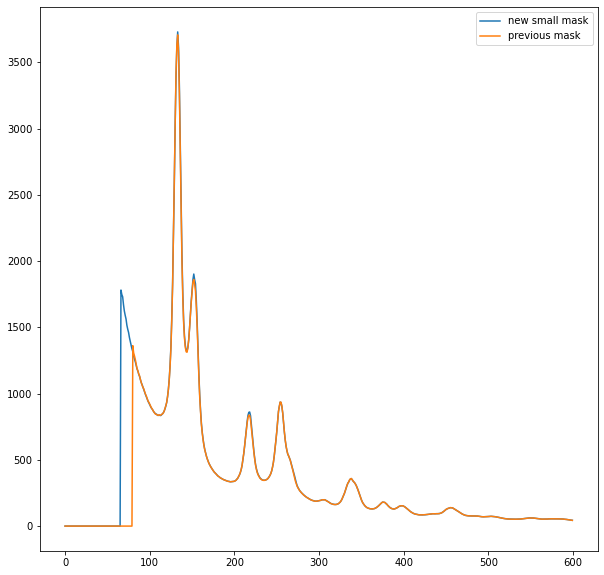

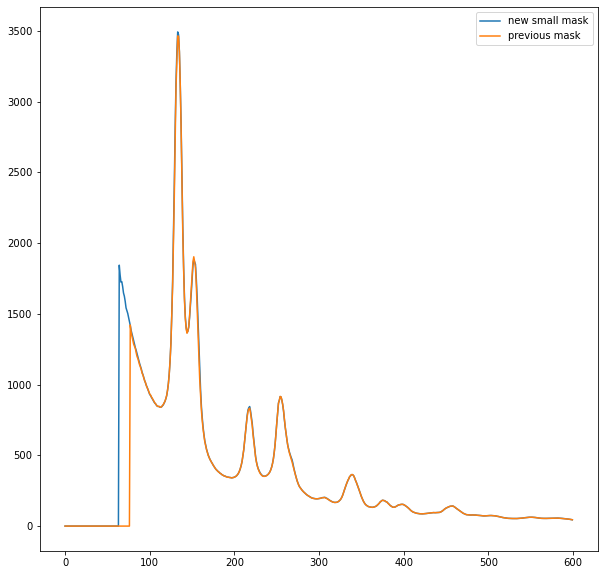

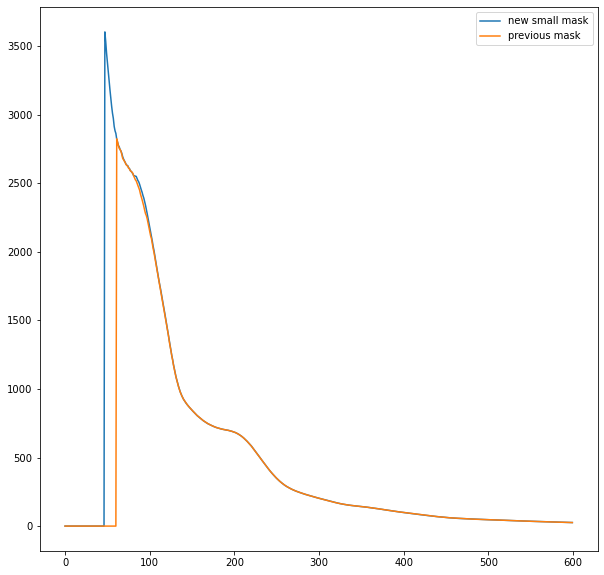

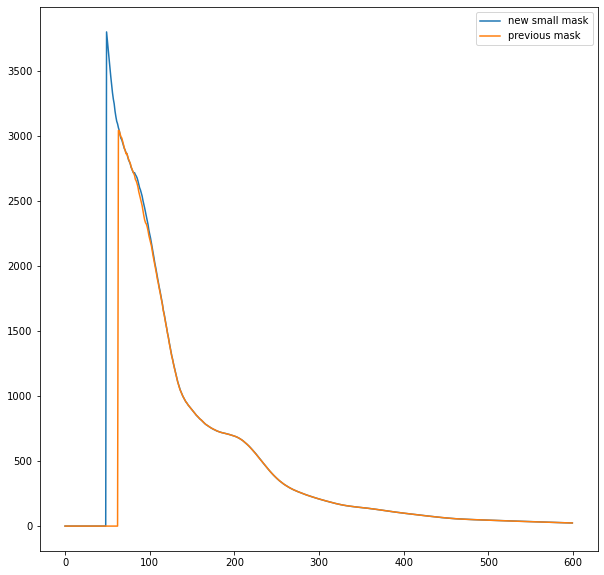

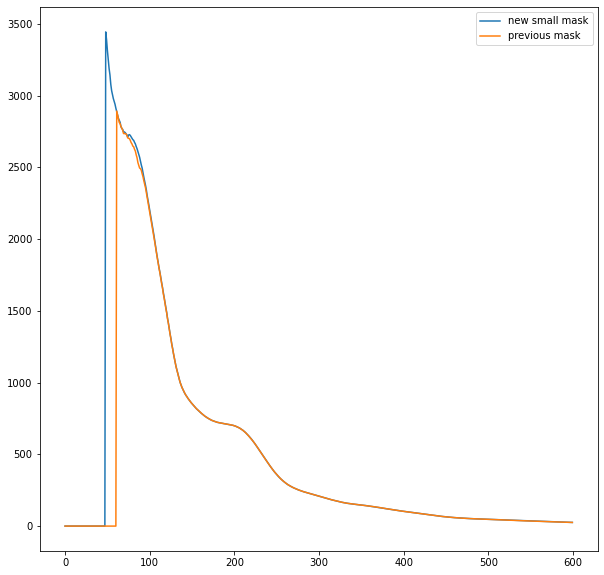

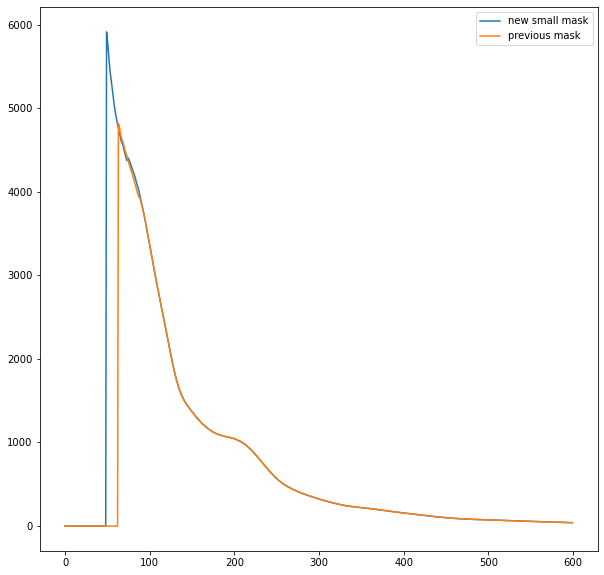

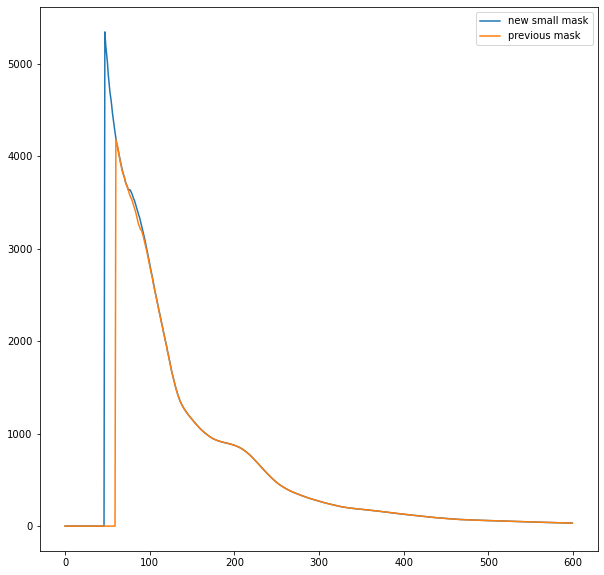

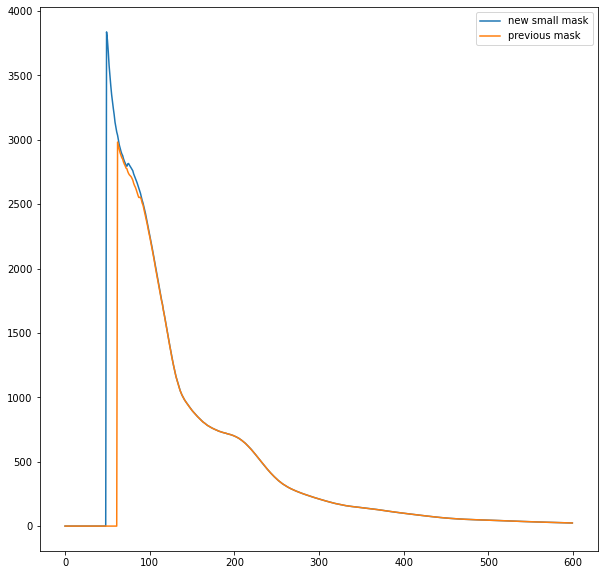

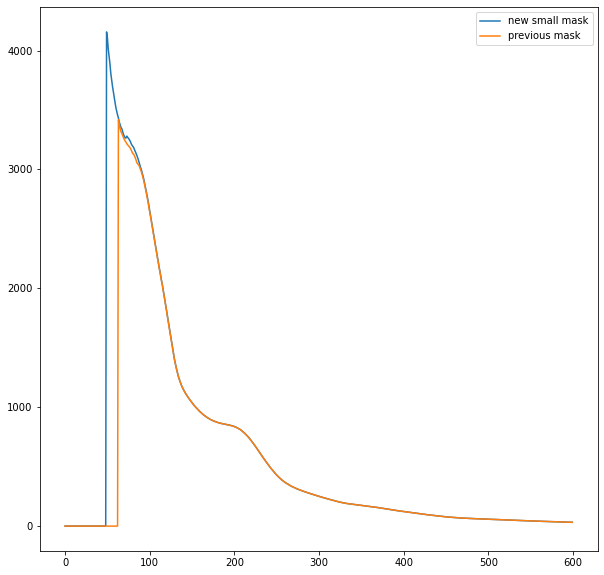

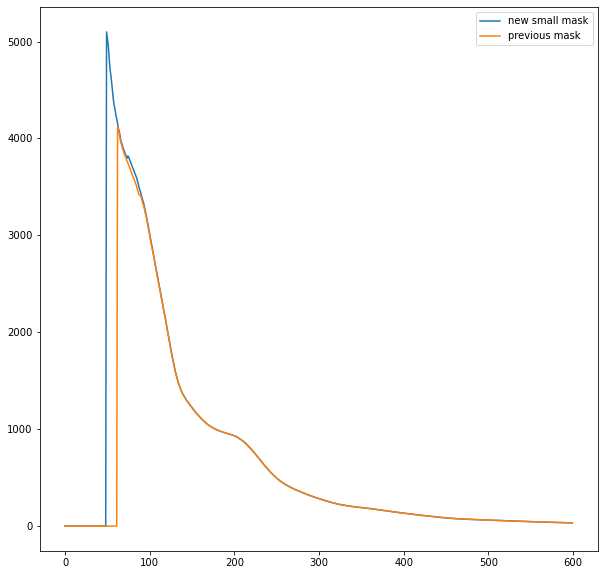

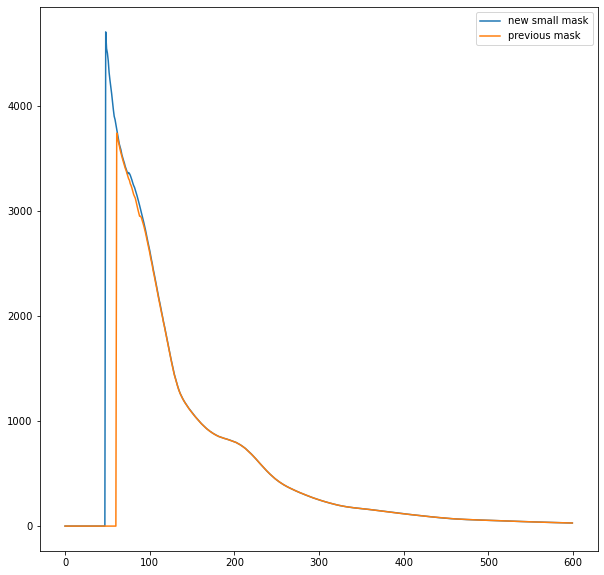

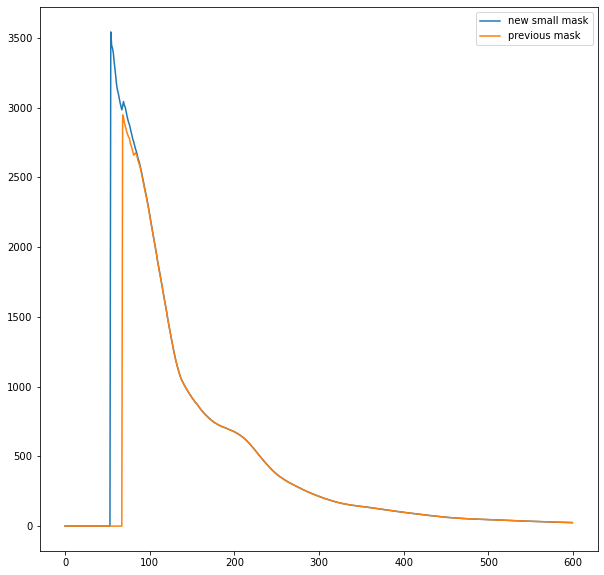

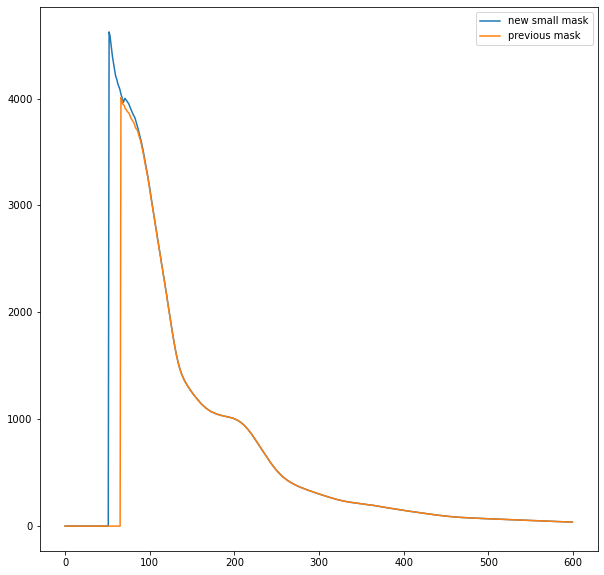

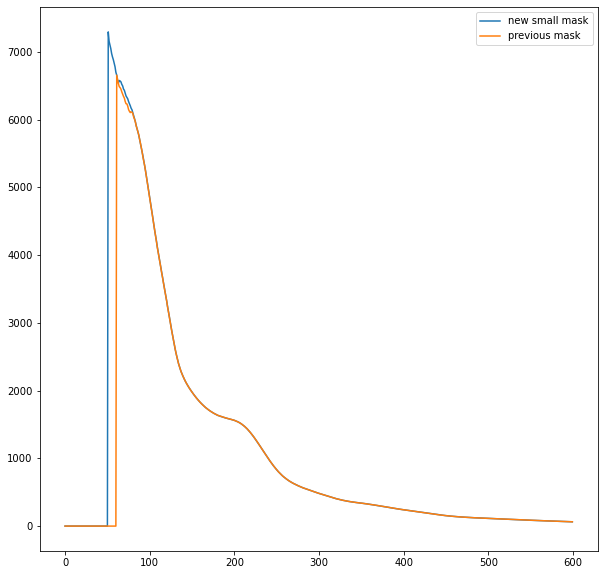

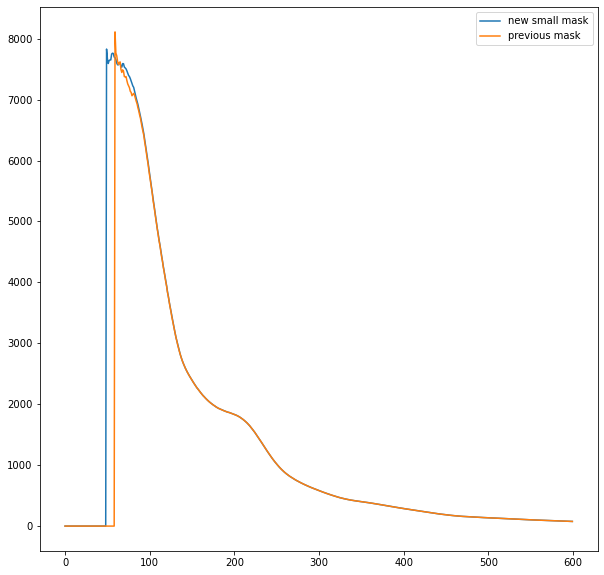

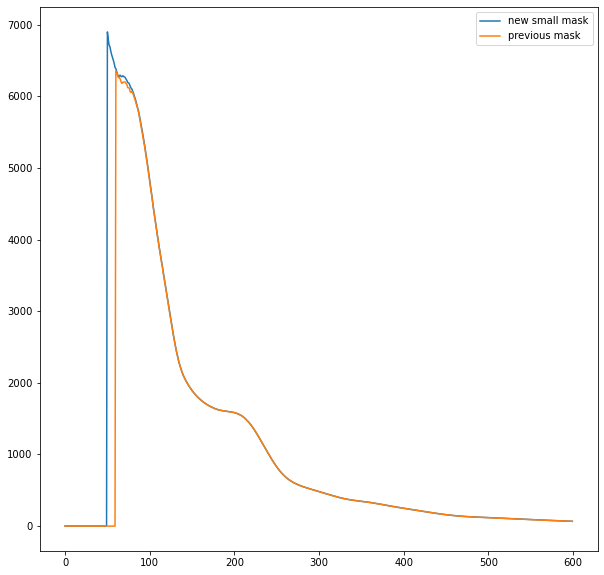

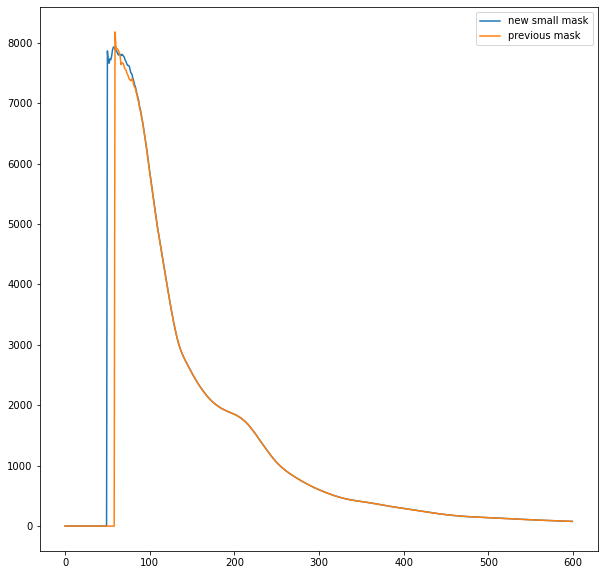

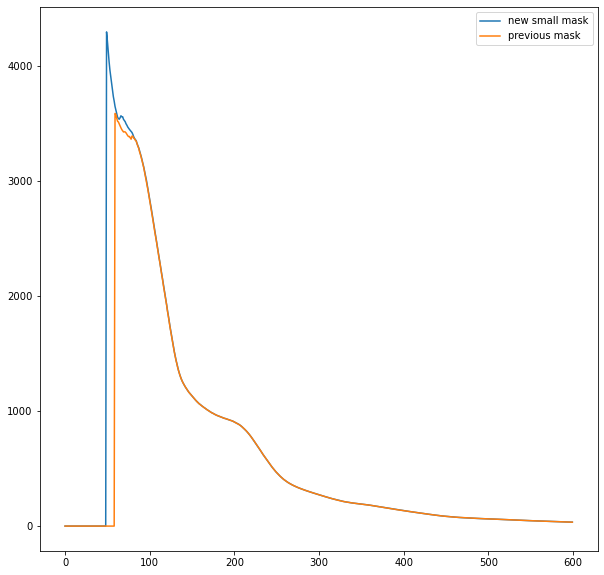

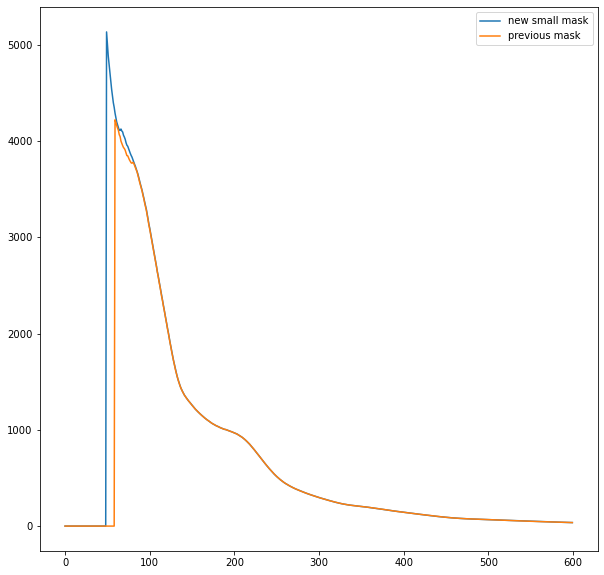

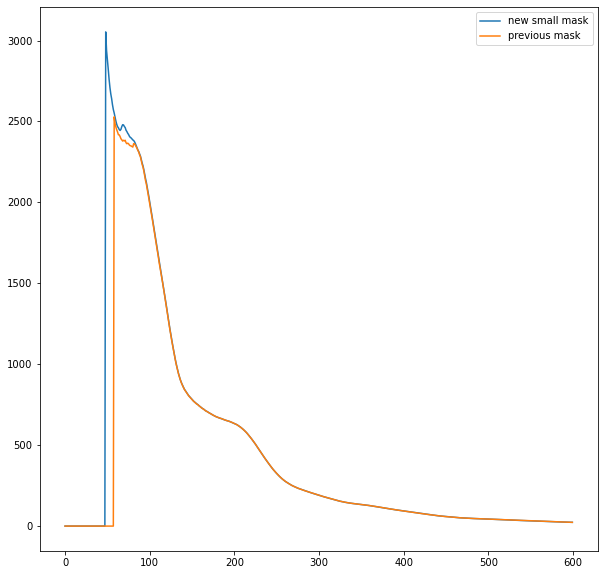

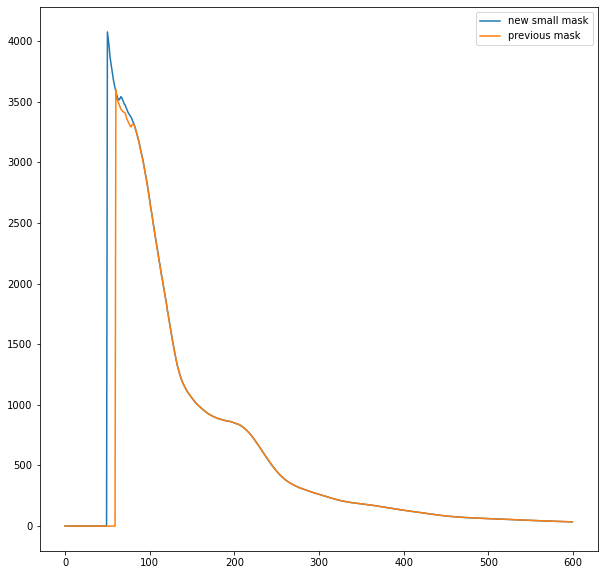

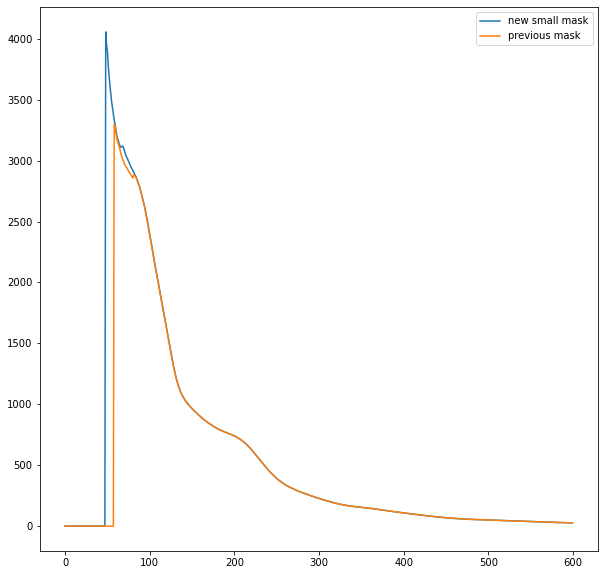

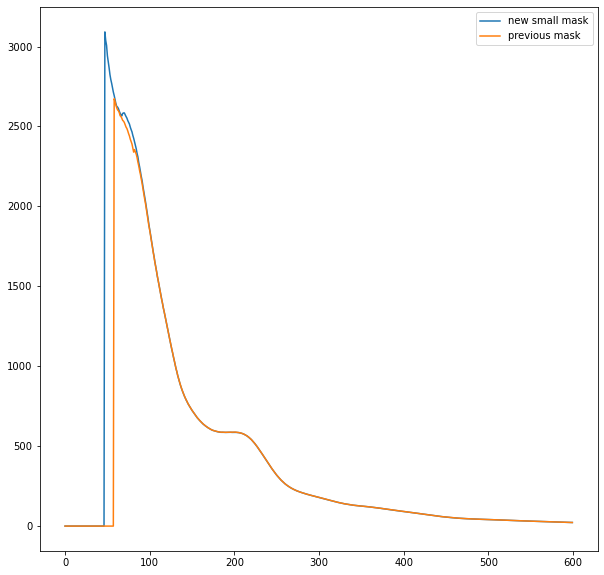

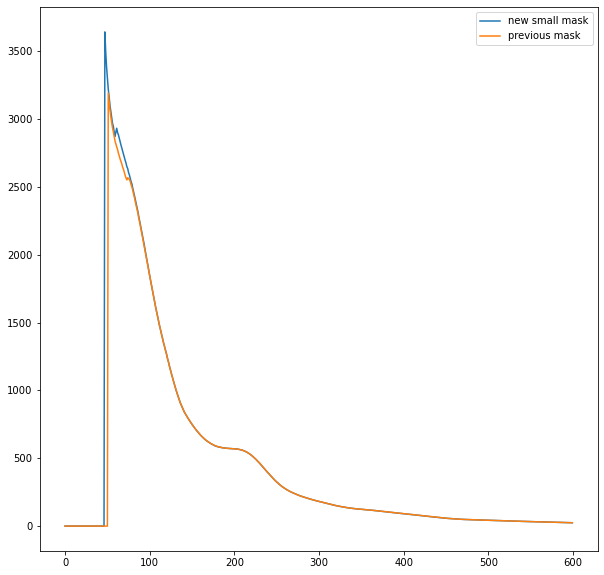

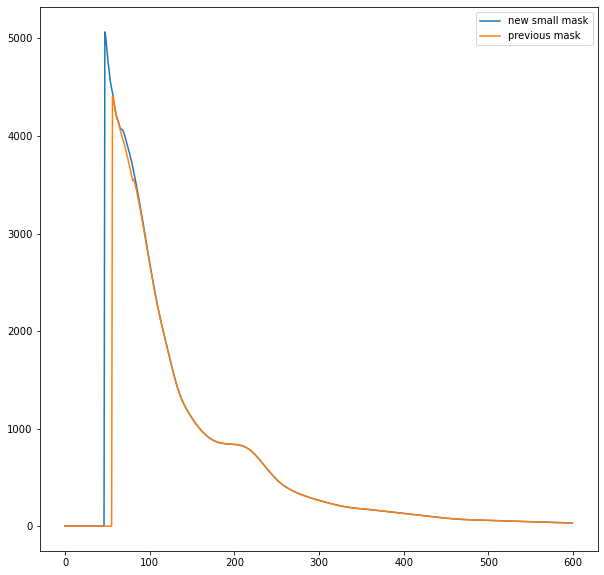

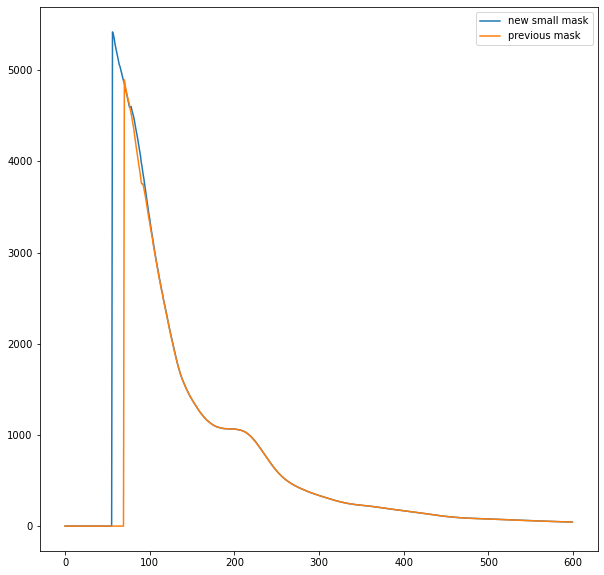

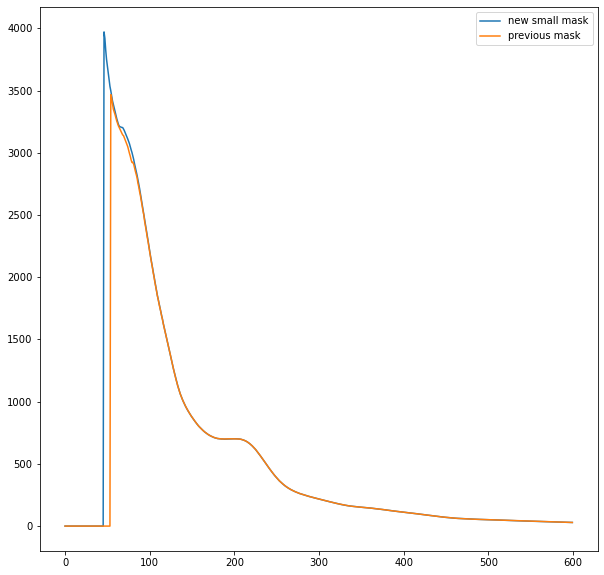

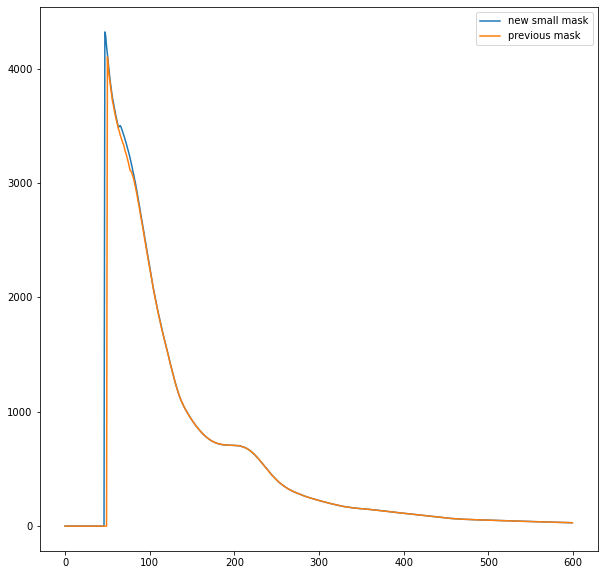

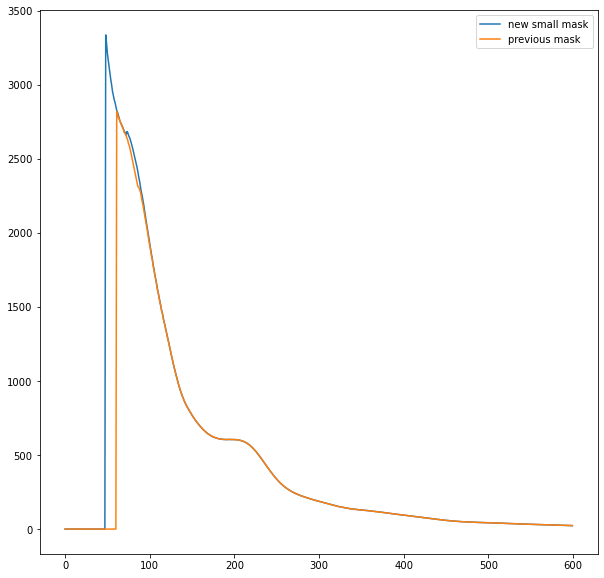

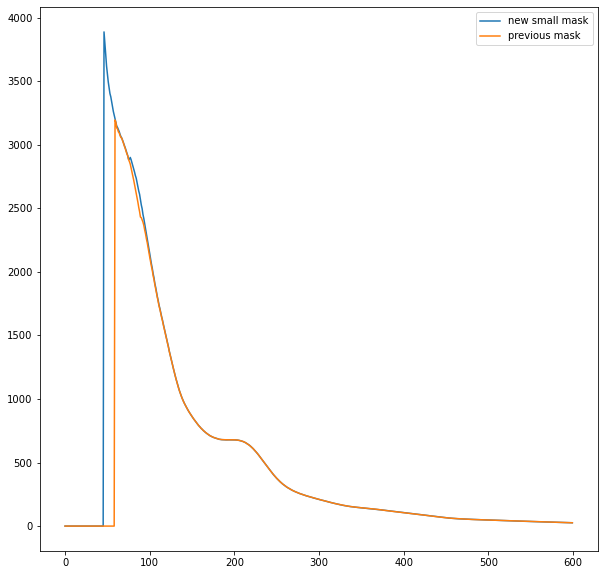

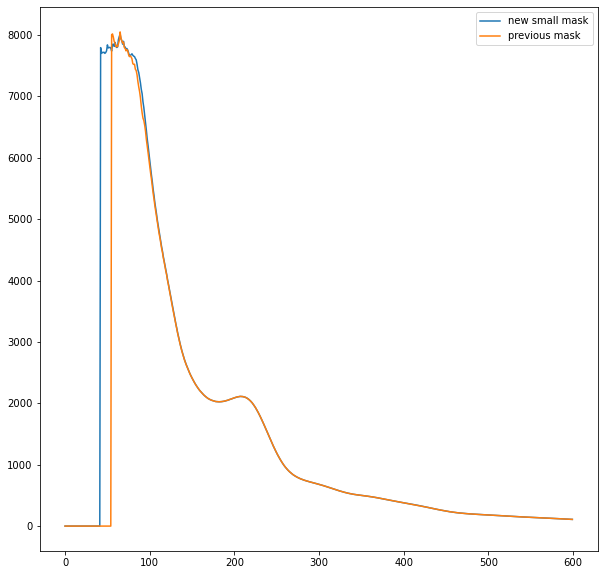

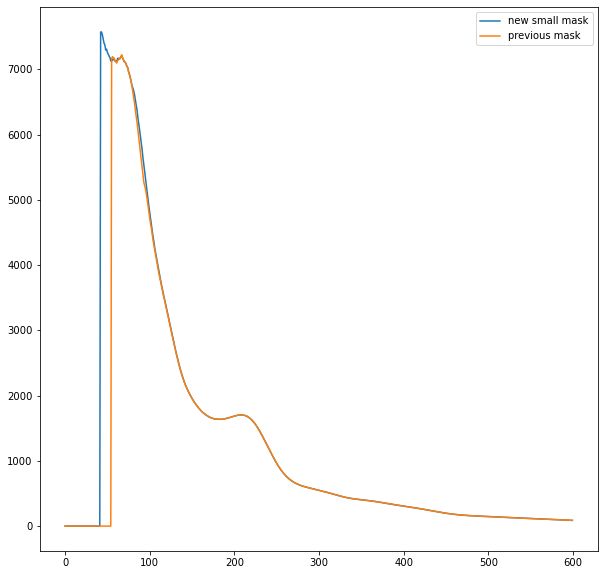

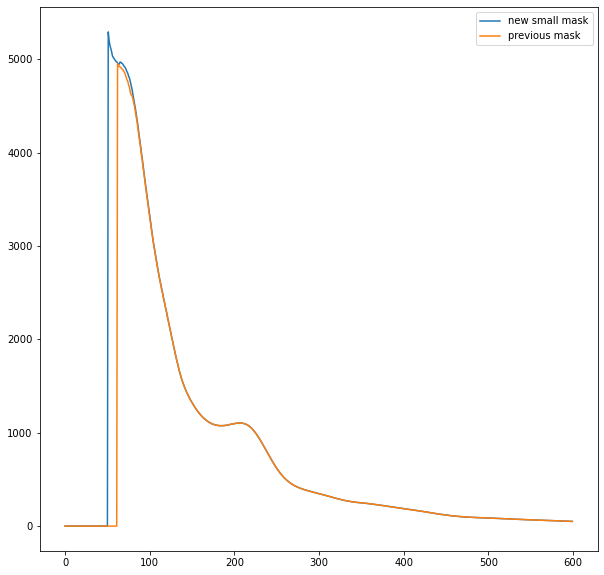

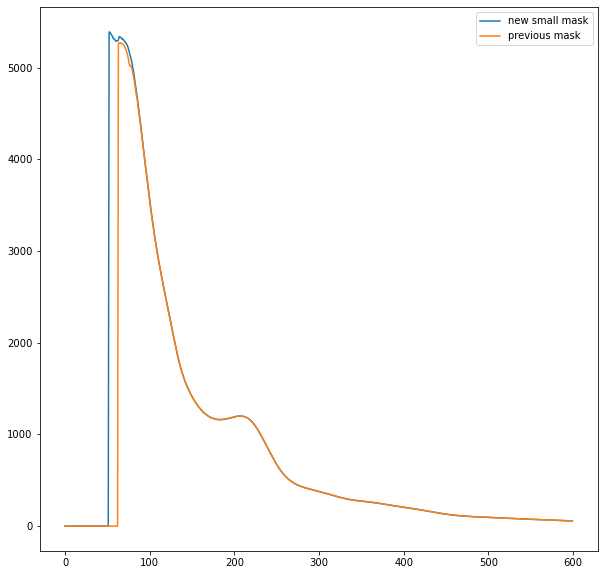

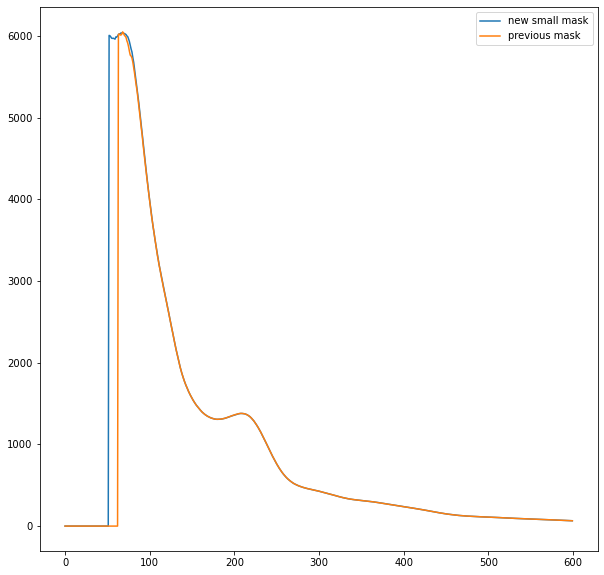

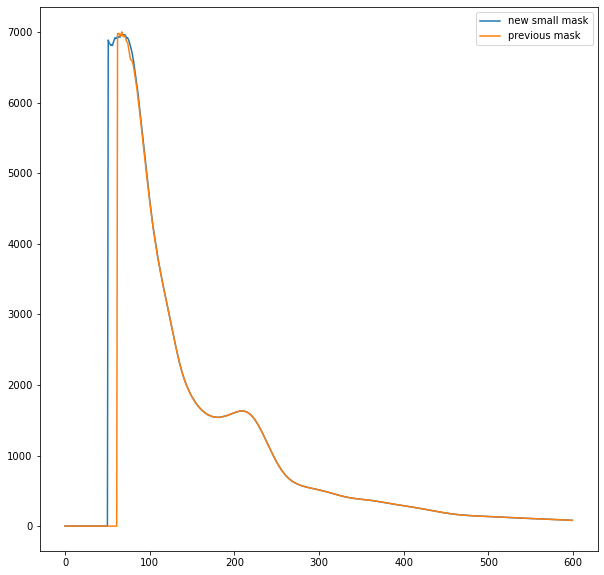

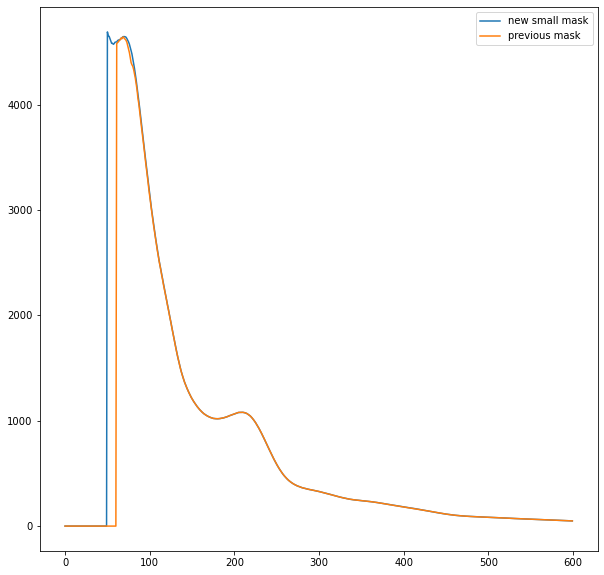

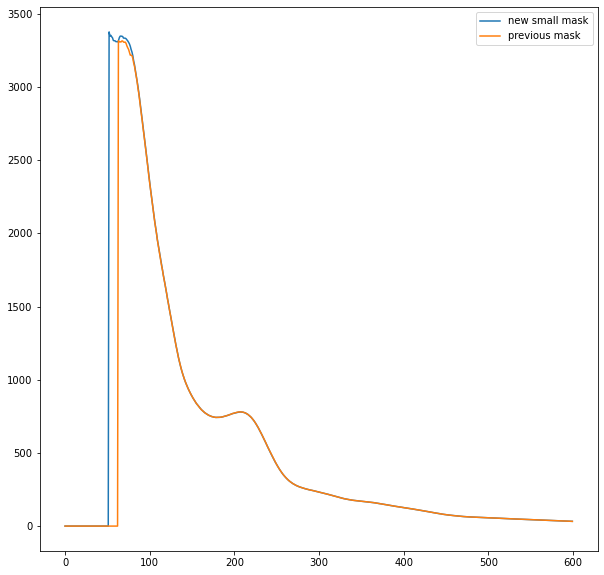

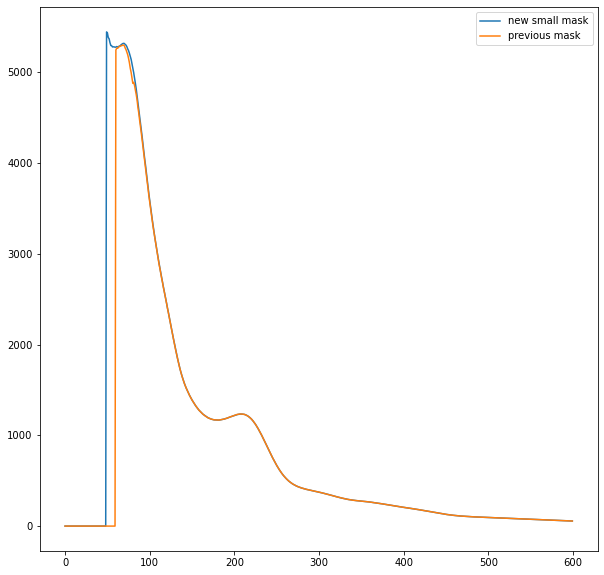

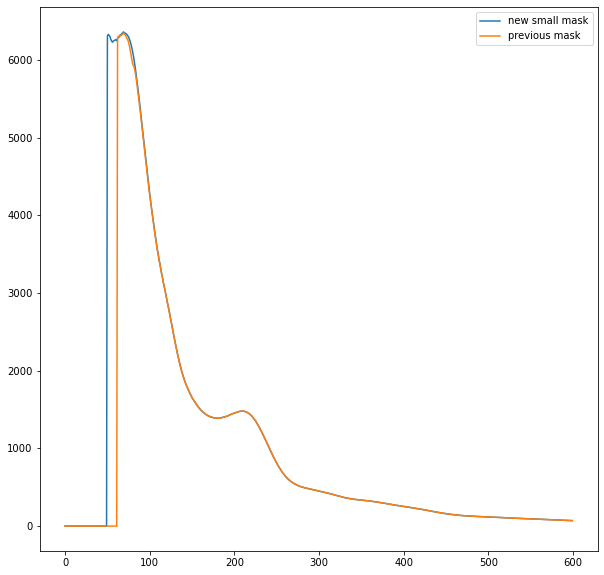

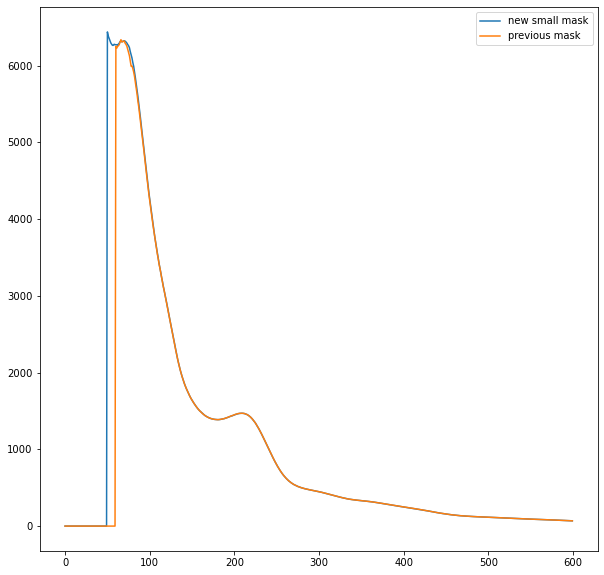

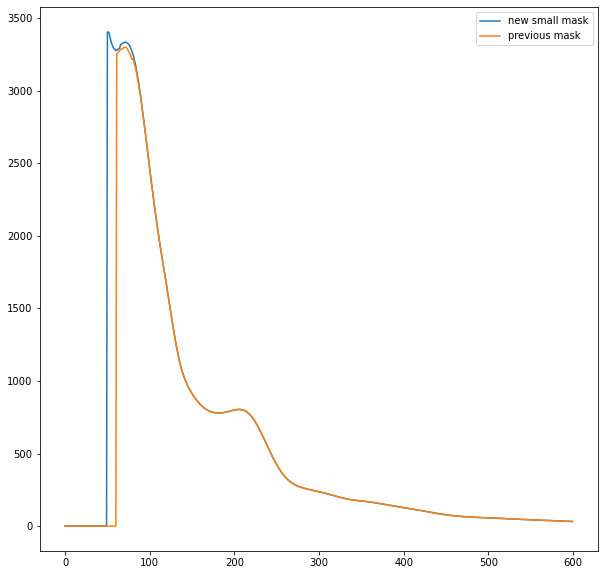

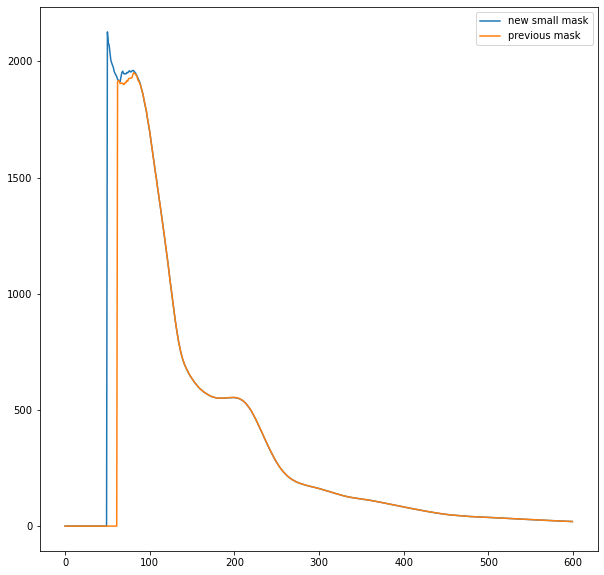

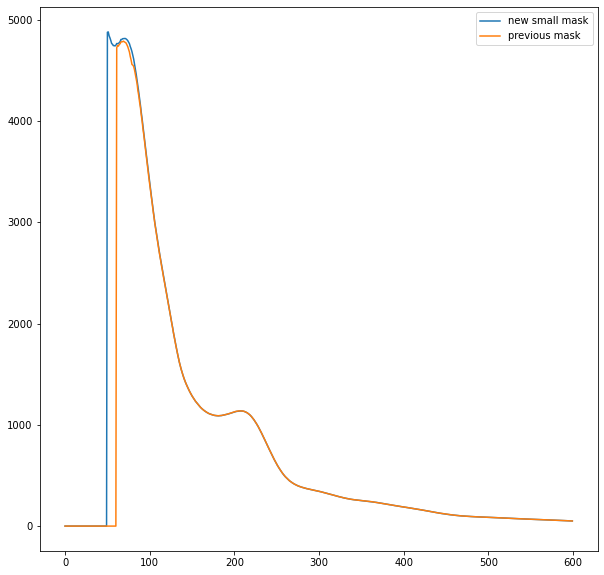

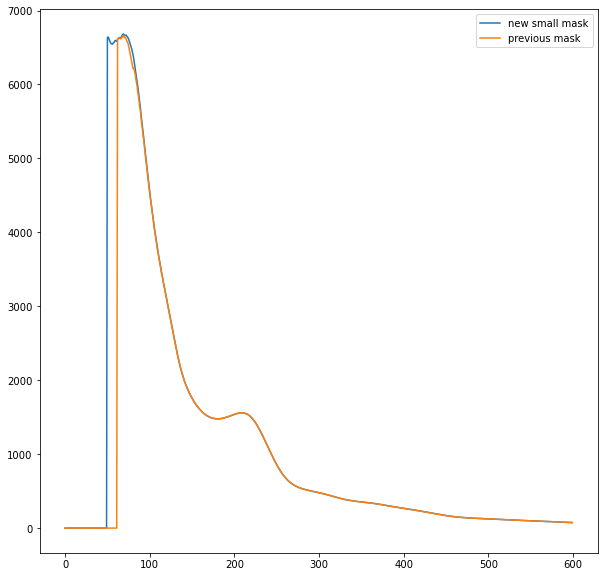

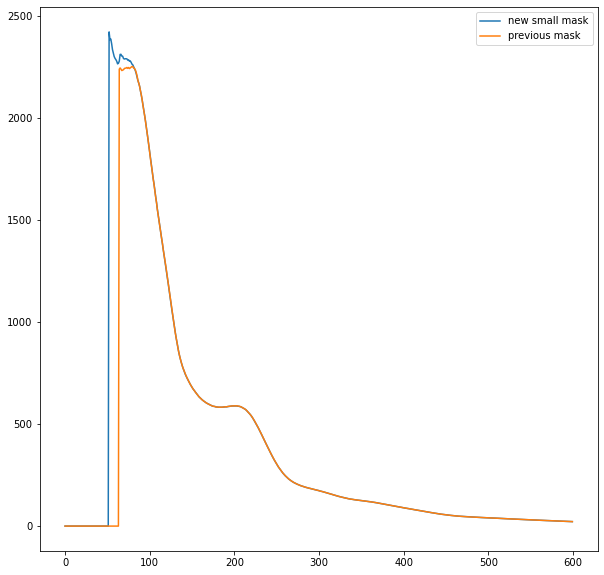

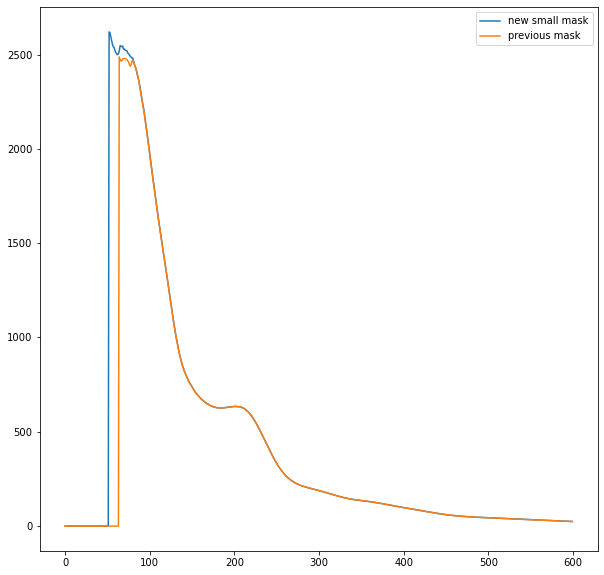

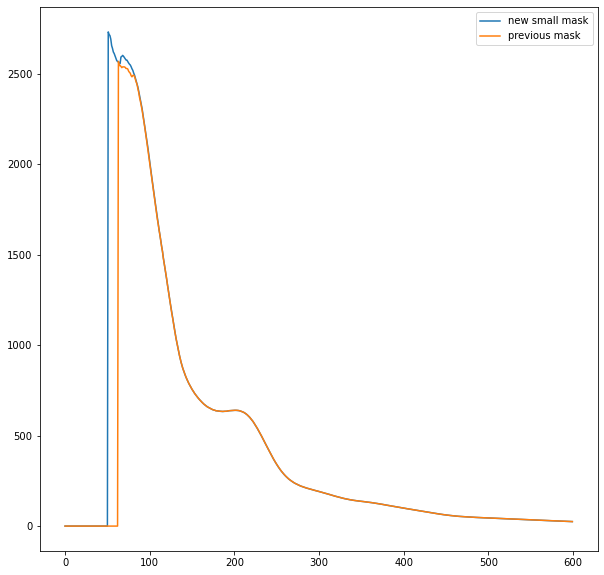

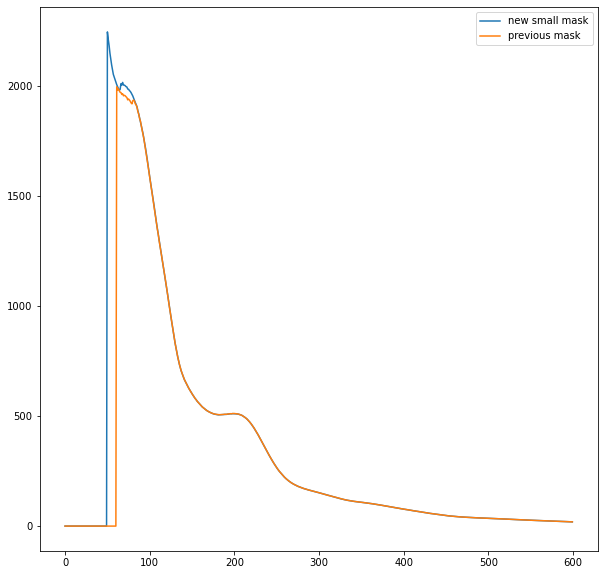

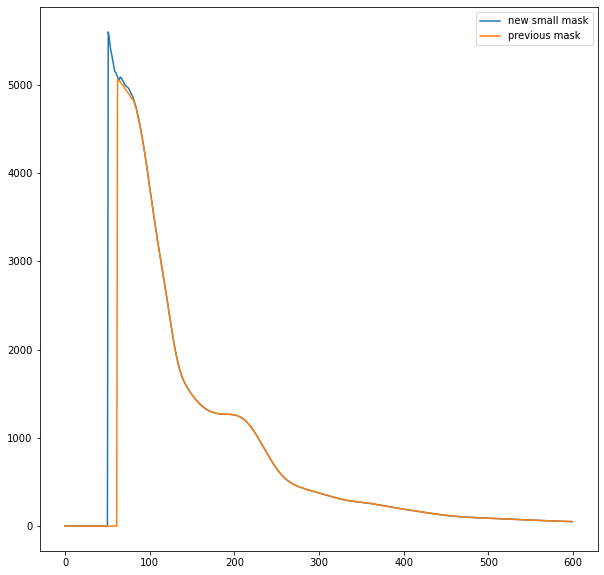

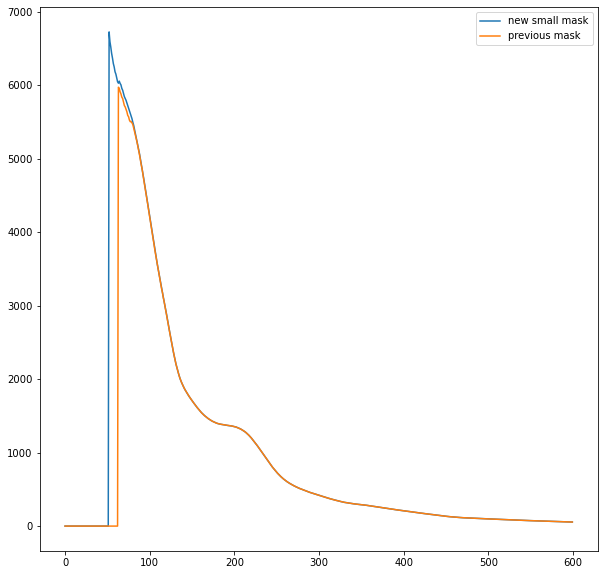

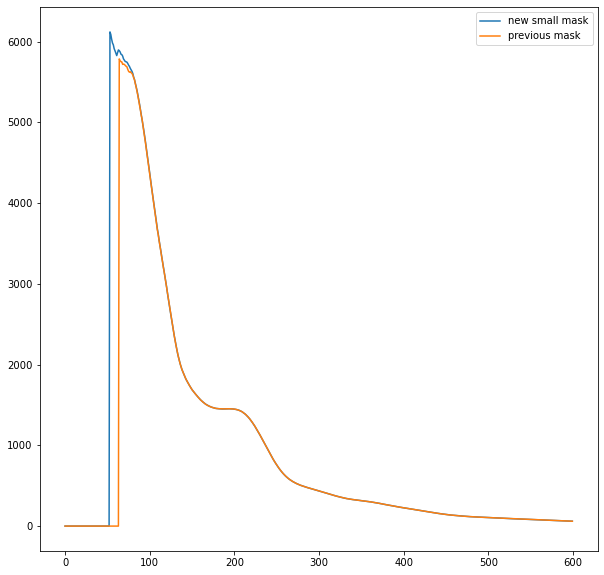

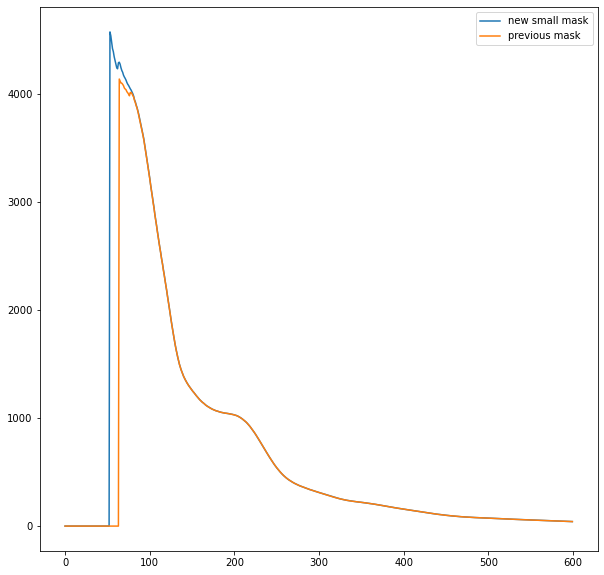

In [13]:
azavg1 = [np.loadtxt(fp) for fp in file.get_file_list_from_path(r"multiple_azavg","mask1.txt")]
azavg2 = [np.loadtxt(fp) for fp in file.get_file_list_from_path(r"multiple_azavg","mask2.txt")]
for azavg_1, azavg_2 in zip(azavg1, azavg2):
    plt.plot(azavg_1[:600], label="new small mask")
    plt.plot(azavg_2[:600], label="previous mask")
    plt.legend()
    plt.show()

In [11]:
for a,b in zip(file.get_file_list_from_path(r"multiple_azavg","mask1.txt"), file.get_file_list_from_path(r"multiple_azavg","mask2.txt")):
    print(a)
    print(b)

/home/pilsung/PycharmProjects/epdfpy/multiple_azavg/Camera 230 mm Ceta 20210506 1309_mask1.txt
/home/pilsung/PycharmProjects/epdfpy/multiple_azavg/Camera 230 mm Ceta 20210506 1309_mask2.txt
/home/pilsung/PycharmProjects/epdfpy/multiple_azavg/Camera 230 mm Ceta 20210506 1310_mask1.txt
/home/pilsung/PycharmProjects/epdfpy/multiple_azavg/Camera 230 mm Ceta 20210506 1310_mask2.txt
/home/pilsung/PycharmProjects/epdfpy/multiple_azavg/Camera 230 mm Ceta 20210506 1407_60s_20f_area01_mask1.txt
/home/pilsung/PycharmProjects/epdfpy/multiple_azavg/Camera 230 mm Ceta 20210506 1407_60s_20f_area01_mask2.txt
/home/pilsung/PycharmProjects/epdfpy/multiple_azavg/Camera 230 mm Ceta 20210506 1412_60s_20f_area02_mask1.txt
/home/pilsung/PycharmProjects/epdfpy/multiple_azavg/Camera 230 mm Ceta 20210506 1412_60s_20f_area02_mask2.txt
/home/pilsung/PycharmProjects/epdfpy/multiple_azavg/Camera 230 mm Ceta 20210506 1416_60s_20f_area03_mask1.txt
/home/pilsung/PycharmProjects/epdfpy/multiple_azavg/Camera 230 mm Ceta